# Quantitative Insights into Schubert’s Winterreise: A Computational Study of Inter-Song Similarities


*Author: Pia Steuck*

## Introduction

This project seeks to analyze the song cycle "Winterreise" by Franz Schubert. The term cycle implies being more than a random collection of pieces. In songs, one source of this supposed coherence, that is often discussed, is the lyrics, which will not be analyzed here. Instead I will focus on different musical parameters: Pitch class count and pitch class duration (for tonality), the number of different pitch classes per measure (for tonal complexity) and the total number of note events (for textural density). 

The project consists of 4 main phases: data collection, data processing, data filtering and selection, and data visulization. In the data collection phase, all music analysis functions are run on all pieces or piece sections. In the data processing phase, the raw music analysis data from the first step is run through different functions for similarity analysis e. g. Pearson correlation and cosine similarity. In the data filtering phase, the most prominent data points are selected for manual interpretation. The data visualization phase serves the purpose of adequately presentings the results/data in a way that is easily accesible for humans. 

The emoji symbols in front of the names of the 4 main phases were added to visually facilitate quick navigation in this Jupyter notebook.

The data used for this analysis is part of the Schubert Winterreise Dataset (version 2) curated by Christoph Weiß et al., which among other resources contains high-quality musicxml-files of Schubert's song cycle.

The goal of this project is not only to gain insight on Schubert's "Winterreise", but at the same time to explore (statistical and algorithmic) methods of similaritiy analysis of symbolic representations of music in general. The methods presented here should be able to be transfered and further developed for the use on other songs cycles or music corpora.

### Setup

First the python library music21 is imported and all pieces of the cycle are parsed.

In [ ]:
from music21 import *
us = environment.UserSettings()
# Path for musicXML reader, should be changed if musicXML reader is located elsewhere on the computer
us['musicxmlPath'] = "C:\ProgramData\Microsoft\Windows\Start Menu\Programs\MuseScore 4"

# With these commands not only 'music21', 
# but also the libraries 'numpy' and 'pandas' for static evaluations and 
# and 'matplotlib' for graphical representations. 
import csv
from IPython.display import HTML, display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

# This is how to import another (.ipynb) file
# %run file.ipynb

# With the following commands the formatting for the tables is specified, 
# which are shown below: 
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

environment.set('autoDownload', 'allow')

# parsing all songs in the cycle
d911_01_gute_nacht = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-01.xml")
d911_02_die_wetterfahne = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-02.xml")
d911_03_gefrorne_traenen = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-03.xml")
d911_04_erstarrung = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-04.xml")
d911_05_der_lindenbaum = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-05.xml")
d911_06_wasserflut = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-06.xml")
d911_07_auf_dem_flusse = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-07.xml")
d911_08_rueckblick = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-08.xml")
d911_09_irrlicht = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-09.xml")
d911_10_rast = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-10.xml")
d911_11_fruehlingstraum = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-11.xml")
d911_12_einsamkeit = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-12.xml")
d911_13_die_post = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-13.xml")
d911_14_der_greise_kopf = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-14.xml")
d911_15_die_kraehe = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-15.xml")
d911_16_letzte_hoffnung = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-16.xml")
d911_17_im_dorfe = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-17.xml")
d911_18_der_stuermische_morgen = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-18.xml")
d911_19_taeuschung = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-19.xml")
d911_20_der_wegweiser = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-20.xml")
d911_21_das_wirtshaus = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-21.xml")
d911_22_mut = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-22.xml")
d911_23_die_nebensonnen = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-23.xml")
d911_24_der_leiermann = converter.parse("Schubert_Winterreise_Dataset_v2-0\\01_RawData\\score_musicxml\\Schubert_D911-24.xml")

Putting all songs in a list that can be iterated over.

In [23]:
all_songs = [d911_01_gute_nacht, 
             d911_02_die_wetterfahne, 
             d911_03_gefrorne_traenen,
             d911_04_erstarrung,
             d911_05_der_lindenbaum, 
             d911_06_wasserflut,
             d911_07_auf_dem_flusse, 
             d911_08_rueckblick,
             d911_09_irrlicht, 
             d911_10_rast, 
             d911_11_fruehlingstraum, 
             d911_12_einsamkeit, 
             d911_13_die_post, 
             d911_14_der_greise_kopf, 
             d911_15_die_kraehe, 
             d911_16_letzte_hoffnung, 
             d911_17_im_dorfe, 
             d911_18_der_stuermische_morgen, 
             d911_19_taeuschung, 
             d911_20_der_wegweiser, 
             d911_21_das_wirtshaus, 
             d911_22_mut, 
             d911_23_die_nebensonnen, 
             d911_24_der_leiermann]

In [24]:
winterreise_song_names = {
    1: "Gute Nacht",
    2: "Die Wetterfahne",
    3: "Gefrorne Tränen",
    4: "Erstarrung",
    5: "Der Lindenbaum",
    6: "Wasserflut",
    7: "Auf dem Flusse",
    8: "Rückblick",
    9: "Irrlicht",
    10: "Rast",
    11: "Frühlingstraum",
    12: "Einsamkeit",
    13: "Die Post",
    14: "Der greise Kopf",
    15: "Die Krähe",
    16: "Letzte Hoffnung",
    17: "Im Dorfe",
    18: "Der stürmische Morgen",
    19: "Täuschung",
    20: "Der Wegweiser",
    21: "Das Wirtshaus",
    22: "Mut",
    23: "Die Nebensonnen",
    24: "Der Leiermann"
}

### Abbreviation Legend

The some abbrevation used in the variable names of this project. I tried to make those clear in the code comments. Additionally this legend can provide an overview.

- **be**: Beginnings and Endings
- **corr**: Correlation
- **cs**: Cosine Similarity
- **num**: Number
- **pc**: Pearson Correlation
- **pcc**: Pitch Class Count
- **pcd**: Pitch Class Duration
- **sim**: Similarity
- **wp**: Whole Pieces
- **wpa**: Whole Pieces Adjacent


## Music analysis functions

The following section contains the functions that are used for music analysis here. Some of these functions were developed as part of a project on Messiaens "Trois mélodies", but have been enhanced to better serve this project. For further information about the functionality of the functions, please refer to the comments (starting with #) or docstrings (enclosed in """) of the respective functions.

Apart from sorting functions (helper functions that are called by the other functions) and the ambitus function, the analysis functions can be divided into two broad categories: those investigating tonality and those exploring musical texture. Although one could argue that `differentPitchClasses()` is also a rough measure for harmonic complexity.

Not all of the functions below were eventually used in this project. However, they hint at what could be further investigated and they can serve as resources for other music analysis

### Sorting functions

Sorting Functions for note names:

In [47]:
notes = [
            'C-', 'C', 'C#',
            'D-', 'D', 'D#',
            'E-', 'E', 'E#',
            'F-', 'F', 'F#', 'F##',
            'G-', 'G', 'G#',
            'A-', 'A', 'A#',
            'B-', 'B', 'B#'
        ]

def sort_by_pitch(note):
  pitch_order = {'B#': 1, 'C': 1, 'C#': 2,
            'D-': 2, 'D': 3, 'D#': 4,
            'E-': 4, 'E': 5, 'F-': 5, 
            'E#': 6, 'F': 6 , 'F#': 7, 'F##': 8,
            'G-': 7, 'G': 8, 'G#': 9,
            'A-': 9, 'A': 10, 'A#': 11,
            'B-': 11, 'B': 12, 'C-': 12}
  # Return the order of the given note
  return pitch_order[note]

In [48]:
def sort_by_pitch_dict(item):
  # Create a dictionary mapping notes to their order on the piano
  pitch_order = {'B#': 1, 'C': 1, 'C#': 2,
            'D-': 2, 'D': 3, 'D#': 4,
            'E-': 4, 'E': 5, 'F-': 5, 
            'E#': 6, 'F': 6 , 'F#': 7, 'F##': 8,
            'G-': 7, 'G': 8, 'G#': 9,
            'A-': 9, 'A': 10, 'A#': 11,
            'B-': 11, 'B': 12, 'C-': 12}
  # Return the order of the given note
  return pitch_order[item[0]]

Sorting dictionary for pitch class values (0-11):

In [49]:
pitchClass_noteName = {
            0: "C" , 1: "C#/D-", 2: "D",
            3: "D#/E-", 4: "E", 5: "F",
            6: "F#", 7: "G", 8: "G#/A-",
            9: "A", 10: "A#/B-", 11: "B"
        }

Sorting dictionary for midi note value (0-127) to note name with octave:

In [50]:
midi_to_note = {
    0: 'C-',
    1: 'C#-/D-',
    2: 'D-',
    3: 'D#-/E-',
    4: 'E-',
    5: 'F-',
    6: 'F#-/G-',
    7: 'G-',
    8: 'G#-/A-',
    9: 'A-',
    10: 'A#-/B-',
    11: 'B-',
    12: 'C0',
    13: 'C#0/D-0',
    14: 'D0',
    15: 'D#0/E-0',
    16: 'E0',
    17: 'F0',
    18: 'F#0/G-0',
    19: 'G0',
    20: 'G#0/A-0',
    21: 'A0',
    22: 'A#0/B-0',
    23: 'B0',
    24: 'C1',
    25: 'C#1/D-1',
    26: 'D1',
    27: 'D#1/E-1',
    28: 'E1',
    29: 'F1',
    30: 'F#1/G-1',
    31: 'G1',
    32: 'G#1/A-1',
    33: 'A1',
    34: 'A#1/B-1',
    35: 'B1',
    36: 'C2',
    37: 'C#2/D-2',
    38: 'D2',
    39: 'D#2/E-2',
    40: 'E2',
    41: 'F2',
    42: 'F#2/G-2',
    43: 'G2',
    44: 'G#2/A-2',
    45: 'A2',
    46: 'A#2/B-2',
    47: 'B2',
    48: 'C3',
    49: 'C#3/D-3',
    50: 'D3',
    51: 'D#3/E-3',
    52: 'E3',
    53: 'F3',
    54: 'F#3/G-3',
    55: 'G3',
    56: 'G#3/A-3',
    57: 'A3',
    58: 'A#3/B-3',
    59: 'B3',
    60: 'C4',
    61: 'C#4/D-4',
    62: 'D4',
    63: 'D#4/E-4',
    64: 'E4',
    65: 'F4',
    66: 'F#4/G-4',
    67: 'G4',
    68: 'G#4/A-4',
    69: 'A4',
    70: 'A#4/B-4',
    71: 'B4',
    72: 'C5',
    73: 'C#5/D-5',
    74: 'D5',
    75: 'D#5/E-5',
    76: 'E5',
    77: 'F5',
    78: 'F#5/G-5',
    79: 'G5',
    80: 'G#5/A-5',
    81: 'A5',
    82: 'A#5/B-5',
    83: 'B5',
    84: 'C6',
    85: 'C#6/D-6',
    86: 'D6',
    87: 'D#6/E-6',
    88: 'E6',
    89: 'F6',
    90: 'F#6/G-6',
    91: 'G6',
    92: 'G#6/A-6',
    93: 'A6',
    94: 'A#6/B-6',
    95: 'B6',
    96: 'C7',
    97: 'C#7/D-7',
    98: 'D7',
    99: 'D#7/E-7',
    100: 'E7',
    101: 'F7',
    102: 'F#7/G-7',
    103: 'G7',
    104: 'G#7/A-7',
    105: 'A7',
    106: 'A#7/B-7',
    107: 'B7',
    108: 'C8',
    109: 'C#8/D-8',
    110: 'D8',
    111: 'D#8/E-8',
    112: 'E8',
    113: 'F8',
    114: 'F#8/G-8',
    115: 'G8',
    116: 'G#8/A-8',
    117: 'A8',
    118: 'A#8/B-8',
    119: 'B8',
    120: 'C9',
    121: 'C#9/D-9',
    122: 'D9',
    123: 'D#9/E-9',
    124: 'E9',
    125: 'F9',
    126: 'F#9/G-9',
    127: 'G9',
}


### Ambitus

In [52]:
def ambitusInfo(music, file_name):
    """
    Analyzes and prints the ambitus (range) and pitch span of a musical piece or part thereof.

    This function takes a music21 stream object and a file name as input. It prints the ambitus 
    (the range between the lowest and highest notes) and the pitch span (lowest and highest pitch) 
    for the entire piece as well as for each individual part within the piece.

    Parameters:
    music (music21.stream.Score): The musical piece to be analyzed.
    file_name (str): The name of the file being analyzed.

    Returns:
    None
    """
    # Print the file name for which ambitus information is being analyzed
    print("ambitusInfo: " + f'{file_name}')
    print("=================================================================================")
    
    # Create an instance of the Ambitus analysis tool
    p = analysis.discrete.Ambitus()
    
    # Get the ambitus (range) of all parts combined
    a = p.getSolution(music)
    a = str(a)
    a = a.replace("<music21.interval.Interval", "")
    a = a.strip(" >")
    print("Ambitus of all parts: " + a)
    
    # Get the lowest and highest pitch of all parts combined
    pitchMin, pitchMax = p.getPitchSpan(music)
    print("Lowest and highest pitch: " + str(pitchMin) + ", " + str(pitchMax))
    print("---------------------------------------------------------------------------------")
    
    # Get the number of parts in the music
    b = len(music.getElementsByClass(stream.Part))
    
    # Iterate through each part to get its ambitus and pitch span
    for x in range(b):
        # Get the ambitus of the current part
        a = p.getSolution(music.parts[x])
        a = str(a)
        a = a.replace("<music21.interval.Interval", "")
        a = a.strip(" >")
        print("Ambitus of part " + str(x+1) + ": " + a)
        
        # Get the lowest and highest pitch of the current part
        pitchMin, pitchMax = p.getPitchSpan(music.parts[x])
        print("Lowest and highest pitch: " + str(pitchMin) + ", " + str(pitchMax))
        print("---------------------------------------------------------------------------------")
    
    print("=================================================================================")

### Tonality

#### `pitchClassCount()`

In [57]:
from collections import Counter

def pitchClassCount(music, name="test", FST=True, avPerMeasure=False, twelveTone=True, showZeroCount=True, numeric=True, showResult=False):
    """
    Analyzes and counts the pitch classes in a musical piece or part thereof.

    This function takes a music21 stream object and various parameters to count and analyze the pitch classes 
    (either by note name or pitch class) in the piece. It can also display the results in a table and plot.

    Parameters:
    music (music21.stream.Score): The musical piece to be analyzed.
    name (str): A string that will appear in titles.
    FST (bool): If True, the note count is based on music.flatten().stripTies(), meaning that tied notes are counted as one note.
    avPerMeasure (bool): If True, the function returns values divided by the number of measures to give an average per measure.
    twelveTone (bool): If True, counts pitch classes (0-11) instead of note names, meaning e. g. Eb and D# would count as the same pitch class.
    showZeroCount (bool): If True, includes pitch classes with zero count in the results (only works with twelveTone=True).
                          If False, only pitch classes with non-zero durations are included.
    numeric (bool): If True, displays pitch classes as numbers (only works with twelveTone=True).
                    If False, displays pitch classes as note names.
    showResult (bool): If True, displays the results in a table and plot.

    Returns:
    list: A list of pitch classes and their counts.
    """
    
    # Get the number of measures in the piece
    try:
        numberOfMeasures = len(music.getElementsByClass(stream.Part)[0].getElementsByClass(stream.Measure))
    except IndexError:
        numberOfMeasures = len(music.getElementsByClass(stream.Measure))
    
    # Flatten and strip ties if FST is True
    if FST: 
        music = music.flatten().stripTies()
        
    # Count pitch classes by note name if twelveTone is False
    if not twelveTone:
        nameCount = analysis.pitchAnalysis.pitchAttributeCount(music, 'name')
        notes_nameCount = [[i, nameCount[i]] for i in sorted(nameCount, key=sort_by_pitch)]
    
    # Count pitch classes (0-11) if twelveTone is True
    if twelveTone:
        nameCount = analysis.pitchAnalysis.pitchAttributeCount(music, 'pitchClass')
        if showZeroCount:
            # Create a Counter with default values of 0 for keys 0 to 11
            complete_collection = Counter({key: 0 for key in range(12)})
            complete_collection.update(nameCount)
            nameCount = complete_collection
        if not numeric:
            notes_nameCount = [[pitchClass_noteName[i], nameCount[i]] for i in sorted(nameCount)]
        else:
            notes_nameCount = [[i, nameCount[i]] for i in sorted(nameCount)]
        
    # Sort by value beginning with highest
    most_common_nameCount = [[n, nameCount[n]] for n, count in nameCount.most_common(len(nameCount))]
        
    # Get average per measure if avPerMeasure is True
    if avPerMeasure:
        for i in range(len(notes_nameCount)):
            notes_nameCount[i-1][1] /= numberOfMeasures
            most_common_nameCount[i-1][1] /= numberOfMeasures
            
    if showResult:
        # Print a title and extra information
        title = "pitchClassCount - " + name
        subtitle = "FST: " + str(FST) + ", avPerMeasure: " + str(avPerMeasure)
        print(title)
        print(subtitle)
        print("----------------------------------------------------------------------------------")
    
        # Display tables and plots with pandas
        data = dict(notes_nameCount)
        plot_data = {
            'Pitch Class': list(data.keys()),
            'Count': list(data.values())
        }
        df = pd.DataFrame(plot_data)
        ax = df.plot(x='Pitch Class', y='Count', kind='bar')
        ax.set_title("Pitch Class Count - " + name)
        plt.show()
        display(HTML(df.to_html(index=False)))
        
        data = dict(most_common_nameCount)
        data = {
            'Pitch Class': list(data.keys()),
            'Count': list(data.values())
        }
        df = pd.DataFrame(data)
        display(HTML(df.to_html(index=False)))
        
        print(notes_nameCount)
    
    return notes_nameCount

#### `pitchClassDuration()`

In [58]:
def pitchClassDuration(music, name="", avPerMeasure=False, twelveTone=True, showZeroCount=True, numeric=True, showResult=False):
    """
    Analyzes and calculates the total duration of each pitch class in a musical piece or part thereof.

    This function takes a music21 stream object and various parameters to calculate the total duration 
    of each pitch class (either by note name or pitch class) in the piece. It can also display the results 
    in a table and plot.

    Parameters:
    music (music21.stream.Score): The musical piece to be analyzed.
    name (str): A string that will appear in titles.
    avPerMeasure (bool): If True, the function returns values divided by the number of measures to give an average per measure.
    twelveTone (bool): If True, counts pitch classes (0-11) instead of note names, meaning e. g. Eb and D# would count as the same pitch class.
    showZeroCount (bool): If True, includes pitch classes with zero count in the results (only works with twelveTone=True).
                          If False, only pitch classes with non-zero durations are included.
    numeric (bool): If True, displays pitch classes as numbers (only works with twelveTone=True).
                    If False, displays pitch classes as note names.
    showResult (bool): If True, displays the results in a table and plot.

    Returns:
    list: A list of pitch classes and their total durations.
    """
    
    durationPerPitch = []

    # Initialize durationPerPitch with zero durations for all pitch classes if showZeroCount is True
    if showZeroCount:
        durationPerPitch = [[i, 0.0] for i in range(12)]
    
    # Get the number of measures in the piece
    try:
        numberOfMeasures = len(music.getElementsByClass(stream.Part)[0].getElementsByClass(stream.Measure))
    except IndexError:
        numberOfMeasures = len(music.getElementsByClass(stream.Measure))
    
    # Calculate durations by note name if twelveTone is False
    if not twelveTone:
        for n in music.recurse().notes:
            if n.isChord:
                chordTones = n.pitches
                for x in chordTones:
                    pitch_name = str(x.name)
                    existing_pitch = next((pitch for pitch in durationPerPitch if pitch[0] == pitch_name), None)
                    if existing_pitch:
                        existing_pitch[1] += n.duration.quarterLength
                    else:
                        durationPerPitch.append([pitch_name, n.duration.quarterLength])
            else:
                pitch_name = str(n.pitch.name)
                existing_pitch = next((pitch for pitch in durationPerPitch if pitch[0] == pitch_name), None)
                if existing_pitch:
                    existing_pitch[1] += n.duration.quarterLength
                else:
                    durationPerPitch.append([pitch_name, n.duration.quarterLength])
        durationPerPitch = sorted(durationPerPitch, key=sort_by_pitch_dict)

    # Calculate durations by pitch class if twelveTone is True
    if twelveTone:
        for n in music.recurse().notes:
            if n.isChord:
                chordTones = n.pitches
                for x in chordTones:
                    pitch_name = x.pitchClass
                    existing_pitch = next((pitch for pitch in durationPerPitch if pitch[0] == pitch_name), None)
                    if existing_pitch:
                        existing_pitch[1] += n.duration.quarterLength
                    else:
                        durationPerPitch.append([pitch_name, n.duration.quarterLength])
            else:
                pitch_name = n.pitch.pitchClass
                existing_pitch = next((pitch for pitch in durationPerPitch if pitch[0] == pitch_name), None)
                if existing_pitch:
                    existing_pitch[1] += n.duration.quarterLength
                else:
                    durationPerPitch.append([pitch_name, n.duration.quarterLength])
        if not numeric: 
            durationPerPitch = [[pitchClass_noteName[item[0]], item[1]] for item in sorted(durationPerPitch)]

    # Get average per measure if avPerMeasure is True
    if avPerMeasure:
        for pitch in durationPerPitch:
            pitch[1] /= numberOfMeasures

    if showResult:
        # Print a title and extra information
        title = "pitchClassDuration - " + name
        subtitle = "avPerMeasure: " + str(avPerMeasure)
        print(title)
        print(subtitle)
        print("----------------------------------------------------------------------------------") 

        # Display table sorted by pitch
        data = durationPerPitch
        data = {
            'Pitch Class': [item[0] for item in data],
            'Duration': [item[1] for item in data]
        }
        df = pd.DataFrame(data)
        display(HTML(df.to_html(index=False)))

        # Display bar chart and table sorted by duration values, beginning with highest values
        data = sorted(durationPerPitch, key=lambda x: x[1], reverse=True)
        data = {
            'Pitch Class': [item[0] for item in data],
            'Duration': [item[1] for item in data]
        }
        df = pd.DataFrame(data)
        ax = df.plot(x='Pitch Class', y='Duration', kind='bar')
        ax.set_title("Duration per Pitch Class - " + name)
        plt.show()
        display(HTML(df.to_html(index=False)))
    
    return durationPerPitch

#### `pitchCount()`

In [59]:
def pitchCount(music, name="", FST=True, avPerMeasure=False, forEachMeasure=False, twelveTone=False, showResult=False):
    """
    Analyzes and counts the occurrences of each pitch in a musical piece or part thereof.

    This function takes a music21 stream object and various parameters to count and analyze the occurrences 
    of each pitch (either by note name with octave or MIDI pitch class) in the piece. It can also display 
    the results in a table and plot.

    Parameters:
    music (music21.stream.Score): The musical piece to be analyzed.
    name (str): A string that will appear in titles.
    FST (bool): If True, the note count is based on music.flatten().stripTies(), meaning that tied notes are counted as one note.
    avPerMeasure (bool): If True, the function returns values divided by the number of measures to give an average per measure.
    forEachMeasure (bool): If True, the function returns values for each measure separately.
    twelveTone (bool): If True, counts pitch classes (0-11) instead of note names, meaning e. g. Eb3 and D#3 would count as the same pitch.
    showResult (bool): If True, displays the results in a table and plot.

    Returns:
    list: A list of pitches and their counts.
    """
    
    # Get the number of measures in the piece
    try:
        numberOfMeasures = len(music.getElementsByClass(stream.Part)[0].getElementsByClass(stream.Measure))
    except IndexError:
        numberOfMeasures = len(music.getElementsByClass(stream.Measure))
    
    # Flatten and strip ties if FST is True
    if FST: 
        music = music.flatten().stripTies()
    
    # Count pitches by note name with octave if twelveTone is False
    if not twelveTone:
        nameOctaveCount = analysis.pitchAnalysis.pitchAttributeCount(music, 'nameWithOctave')
        notes_nameOctaveCount = [[i, nameOctaveCount[i]] for i in sorted(nameOctaveCount)]
        most_common_nameOctaveCount = [[n, nameOctaveCount[n]] for n, count in nameOctaveCount.most_common(len(nameOctaveCount))]
        
    # Count pitches by MIDI pitch class if twelveTone is True
    if twelveTone:
        nameOctaveCount = analysis.pitchAnalysis.pitchAttributeCount(music, 'midi')
        notes_nameOctaveCount = [[midi_to_note[i], nameOctaveCount[i]] for i in sorted(nameOctaveCount)]
        most_common_nameOctaveCount = [[midi_to_note[n], nameOctaveCount[n]] for n, count in nameOctaveCount.most_common(len(nameOctaveCount))]
        
    # Get average per measure if avPerMeasure is True
    if avPerMeasure:
        for i in range(len(notes_nameOctaveCount)):
            notes_nameOctaveCount[i-1][1] /= numberOfMeasures
            most_common_nameOctaveCount[i-1][1] /= numberOfMeasures

    if showResult:
        # Print a title and extra information
        title = "pitchClassCount - " + name
        subtitle = "FST: " + str(FST) + ", avPerMeasure: " + str(avPerMeasure)
        print(title)
        print(subtitle)
        print("----------------------------------------------------------------------------------")  
        
        # Display tables and plots with pandas
        data = dict(notes_nameOctaveCount)
        plot_data = {
            'Pitch': list(data.keys()),
            'Count': list(data.values())
        }
        df = pd.DataFrame(plot_data)
        ax = df.plot(x='Pitch', y='Count', kind='bar')
        ax.set_title("Pitch Count - " + name)
        plt.show()
        display(HTML(df.to_html(index=False)))
        
        data = dict(most_common_nameOctaveCount)
        data = {
            'Pitch': list(data.keys()),
            'Count': list(data.values())
        }
        df = pd.DataFrame(data)
        display(HTML(df.to_html(index=False)))
    
    return notes_nameOctaveCount

#### `pitchDuration()`

In [60]:
def pitchDuration(music, name="", avPerMeasure=False):
    """
    Analyzes and calculates the total duration of each pitch in a musical piece.

    This function takes a music21 stream object and various parameters to calculate the total duration 
    of each pitch in the piece. It can also display the results in a table and plot.

    Parameters:
    music (music21.stream.Score): The musical piece to be analyzed.
    name (str): A string that will appear in titles.
    avPerMeasure (bool): If True, the function returns values divided by the number of measures to give an average per measure.

    Returns:
    dict: A dictionary of pitches and their total durations.
    """
    
    title = "pitchDuration - " + name
    subtitle = "avPerMeasure: " + str(avPerMeasure)
    print(title)
    print(subtitle)
    print("----------------------------------------------------------------------------------")
    
    durationPerPitch = {}
    
    # Get the number of measures in the piece
    try:
        numberOfMeasures = len(music.getElementsByClass(stream.Part)[0].getElementsByClass(stream.Measure))
    except IndexError:
        numberOfMeasures = len(music.getElementsByClass(stream.Measure))
    
    # Calculate the total duration for each pitch
    for n in music.recurse().notes:
        if n.isChord:
            chordTones = n.pitches
            for x in chordTones:
                if str(x.name) not in durationPerPitch:
                    durationPerPitch[str(x)] = n.duration.quarterLength
                else: 
                    durationPerPitch[str(x)] += n.duration.quarterLength
        else:
            if str(n.pitch) not in durationPerPitch:
                durationPerPitch[str(n.pitch)] = n.duration.quarterLength
            else: 
                durationPerPitch[str(n.pitch)] += n.duration.quarterLength
                
    # Get the average per measure if avPerMeasure is True
    if avPerMeasure:
        for n in durationPerPitch:
            durationPerPitch[n] /= numberOfMeasures

    # Display table sorted by pitch
    data = dict(sorted(durationPerPitch.items()))
    data = {
        'Pitch Class': list(data.keys()),
        'Duration': list(data.values())
    }
    df = pd.DataFrame(data)
    display(HTML(df.to_html(index=False)))

    # Display bar chart and table sorted by duration values, beginning with highest values
    data = dict(sorted(durationPerPitch.items(), key=lambda x: x[1], reverse=True))
    data = {
        'Pitch Class': list(data.keys()),
        'Duration': list(data.values())
    }
    df = pd.DataFrame(data)
    ax = df.plot(x='Pitch Class', y='Duration', kind='bar')
    ax.set_title("Duration per Pitch Class - " + name)
    plt.show()
    display(HTML(df.to_html(index=False)))

### Textural density

#### `differentPitchClasses()`

In [63]:
# Note: flatten().stripTies() (FST) doesn't matter here

def differentPitchClasses(music, file_name="", avPerMeasure=True, forEachMeasure=False, twelveTone=False, showResult=False):
    """
    Analyzes and counts the number of different pitch classes in a musical piece.

    This function takes a music21 stream object and various parameters to count and analyze the number of 
    different pitch classes (either by note name or pitch class) in the piece. It can also display the results 
    in a table and plot.

    Parameters:
    music (music21.stream.Score): The musical piece to be analyzed.
    file_name (str): A string that will appear in titles.
    avPerMeasure (bool): If True, the function returns the average number of different pitch classes per measure.
    forEachMeasure (bool): If True, the function returns the number of different pitch classes for each measure separately.
    twelveTone (bool): If True, counts pitch classes (0-11) instead of note names, meaning e. g. Eb and D# would count as the same pitch class.
    showResult (bool): If True, displays the results in a table and plot.

    Returns:
    int or float or list: The number of different pitch classes, the average number per measure, or a list of counts per measure.
    """
    import statistics
    
    # Get the number of measures in the piece
    try:
        numberOfMeasures = len(music.getElementsByClass(stream.Part)[0].getElementsByClass(stream.Measure))
    except IndexError:
        numberOfMeasures = len(music.getElementsByClass(stream.Measure))
    
    # Count the number of different pitch classes for the whole piece
    nameCount = analysis.pitchAnalysis.pitchAttributeCount(music, 'name')
    if twelveTone:
        nameCount = analysis.pitchAnalysis.pitchAttributeCount(music, 'pitchClass')
    differentPitchClasses = len(nameCount)    

    # Get the number of the first measure
    measures = music.getElementsByClass(stream.Part)[0].getElementsByClass(stream.Measure)
    beginningMeasure = measures[0].number

    # Count the number of different pitch classes for each measure
    data = {}
    for x in range(numberOfMeasures):
        nameCount = analysis.pitchAnalysis.pitchAttributeCount(music.measures(x + beginningMeasure, x + beginningMeasure), 'name')
        currentValue = len(nameCount)
        data[x + beginningMeasure] = currentValue 
            
    # Get the average number of different pitch classes per measure if avPerMeasure is True
    if avPerMeasure:
        forEachMeasure = False
        res = sum(data.values()) / len(data)
        res_stdev = statistics.stdev(data.values())
    
    if showResult:
        print("differentPitchClasses - " + file_name)
        print("=================================================================================")

        if forEachMeasure:
            print("Number of pitch classes for each measure - " + file_name + ": ") 
            plot_data = {
                'Measure': list(data.keys()),
                'Count': list(data.values())
            }
            df = pd.DataFrame(plot_data)
            ax = df.plot(x='Measure', y='Count', kind='bar', figsize=(9, 6))
            ax.set_xticks(range(4, len(df), 5))
            plt.show()
        
            table_data = {key: [value] for key, value in data.items()}
            df_horizontal = pd.DataFrame(table_data)
            df_horizontal.columns.name = "Measure"
            df_horizontal.rename(index={0: "Count"}, inplace=True)
            
            # Display table in multiple lines if table gets too long
            if 60 >= len(table_data.keys()) > 30:
                df_part1 = df_horizontal.iloc[:, :30]
                df_part2 = df_horizontal.iloc[:, 30:]
                display(HTML(df_part1.to_html(index=True)))
                display(HTML(df_part2.to_html(index=True)))
            elif len(table_data.keys()) > 60:
                df_part1 = df_horizontal.iloc[:, :30]
                df_part2 = df_horizontal.iloc[:, 30:60]
                df_part3 = df_horizontal.iloc[:, 60:]
                display(HTML(df_part1.to_html(index=True)))
                display(HTML(df_part2.to_html(index=True)))
                display(HTML(df_part3.to_html(index=True)))
            else: 
                display(HTML(df_horizontal.to_html(index=True)))
    
        print("Number of pitch classes - " + file_name + ": " + str(differentPitchClasses))
        if avPerMeasure:
            print("Number of pitch classes on average - " + file_name + ": " + str(res) + " per measure")
            print("Standard Deviation: " + str(res_stdev))
        print("=================================================================================")

    # Return the data
    if forEachMeasure:
        data = [[key, value] for key, value in data.items()]
        return data
    if avPerMeasure:
        return res
    else:
        return differentPitchClasses

#### `totalNoteCount()`

In [64]:
def totalNoteCount(music, name="", FST=True, avPerMeasure=False, forEachMeasure=True, showResult=False):
    """
    Analyzes and counts the total number of notes in a musical piece.

    This function takes a music21 stream object and various parameters to count and analyze the total number of 
    notes in the piece. It can also display the results in a table and plot.

    Parameters:
    music (music21.stream.Score): The musical piece to be analyzed.
    name (str): A string that will appear in titles.
    FST (bool): If True, the note count is based on music.flatten().stripTies(), meaning that tied notes are counted as one note.
    avPerMeasure (bool): If True, the function returns the average number of notes per measure.
    forEachMeasure (bool): If True, the function returns the number of notes for each measure separately.
    showResult (bool): If True, displays the results in a table and plot.

    Note:
    beginningMeasure must be set if not 1 in order for forEachMeasure to work.
    Example: when music = piece.measures(2,4) then beginningMeasure = 2.

    Returns:
    int or float or list: The total number of notes, the average number per measure, or a list of counts per measure.
    """
    import statistics
    
    totalNumberOfNotes = 0
    
    # Get the number of measures in the piece
    try:
        numberOfMeasures = len(music.getElementsByClass(stream.Part)[0].getElementsByClass(stream.Measure))
    # Calculation works differently for parts of Score e. g. musicSoprano
    except IndexError:
        numberOfMeasures = len(music.getElementsByClass(stream.Measure))

    # Get the number of the first measure
    measures = music.getElementsByClass(stream.Part)[0].getElementsByClass(stream.Measure)
    beginningMeasure = measures[0].number

    # Make a copy of the non-flattened music for later use
    music_non_FST = music

    # Flatten and strip ties if FST is True
    if FST: 
        music = music.flatten().stripTies()
    
    # Calculate the total number of notes for the whole piece
    nameCount = analysis.pitchAnalysis.pitchAttributeCount(music, 'name')
    for i in nameCount:
        totalNumberOfNotes += nameCount[i]
        
    # Calculate the total number of notes for each measure if forEachMeasure is True   
    data = {}
    if forEachMeasure:
        a = beginningMeasure
        for x in range(numberOfMeasures):
            currentValue = 0
            if FST:
                nameCount = analysis.pitchAnalysis.pitchAttributeCount(music_non_FST.measures(x + a, x + a).flatten().stripTies(), 'name')
                for i in nameCount:
                    currentValue += nameCount[i]
                    data[x + a] = currentValue
            else:
                nameCount = analysis.pitchAnalysis.pitchAttributeCount(music_non_FST.measures(x + a, x + a), 'name')
                for i in nameCount:
                    currentValue += nameCount[i]
                    data[x + a] = currentValue
        
        # Calculate standard deviation
        if len(data.values()) >= 2:            
            res_stdev = statistics.stdev(data.values())

    # Get the average number of notes per measure if avPerMeasure is True
    if avPerMeasure:
        avg = totalNumberOfNotes / numberOfMeasures

    if showResult:
        print("totalNoteCount - " + name)
        print("=================================================================================")
        print("Total number of notes - " + name + ": " + str(totalNumberOfNotes))
        if avPerMeasure:
            print("Number of notes on average - " + name + ": " + str(avg) + " per measure")
        if forEachMeasure:
            print("Total number of notes for each measure - " + name + ": ")
            print("Standard Deviation: " + str(res_stdev))
        print("=================================================================================")    
    
        plot_data = {
            'Measure': list(data.keys()),
            'Count': list(data.values())
        }
        df = pd.DataFrame(plot_data)
        ax = df.plot(x='Measure', y='Count', kind='bar', figsize=(9, 6))
        ax.set_xticks(range(4, len(df), 5))
        plt.show()
        
        data = {key: [value] for key, value in data.items()}
        df_horizontal = pd.DataFrame(data)
        df_horizontal.columns.name = "Measure"
        df_horizontal.rename(index={0: "Count"}, inplace=True)
        
        # Display table in multiple lines if table gets too long
        if 60 >= len(data.keys()) > 30:
            df_part1 = df_horizontal.iloc[:, :30]
            df_part2 = df_horizontal.iloc[:, 30:]
            display(HTML(df_part1.to_html(index=True)))
            display(HTML(df_part2.to_html(index=True)))
        elif len(data.keys()) > 60:
            df_part1 = df_horizontal.iloc[:, :30]
            df_part2 = df_horizontal.iloc[:, 30:60]
            df_part3 = df_horizontal.iloc[:, 60:]
            display(HTML(df_part1.to_html(index=True)))
            display(HTML(df_part2.to_html(index=True)))
            display(HTML(df_part3.to_html(index=True)))  
        else: 
            display(HTML(df_horizontal.to_html(index=True)))
        
    # Return the data
    if avPerMeasure:
        return avg
    elif forEachMeasure:
        data = [[key, value] for key, value in data.items()]    
        return data
    else:
        return totalNumberOfNotes

Could I correlate these 2 parameters with length in measures for each piece?

# Analysis

## 🍃 Data collection

In this section, all music analysis functions are run on all pieces or piece sections, therefore collecting the data needed for further analysis.

### 1 Beginnings and endings

The beginnings and endings of each piece are analyzed in order to investigate musical connectivity between adjacent pieces. Assuming for example a listening situation in which one still remembers the ending of the last piece, what effect will the beginning of the next piece have? A continuation? A contrast? ...

The function `getBeginningsEndingsData` collects the results of different music analysis functions from the beginnings and endings (first and last 4 measures) of each piece.

**Input:** function e. g. `pitchClassCount()`, `pitchClassDuration()` etc., data collection e. g. `all_songs`

**Output:** `beginnings_data` and `endings_data`, both arrays of arrays with all the data for each piece

Pickup measures at the beginning are not included, to make all sections the same length and therefore better suited for similarity analysis.

In [65]:
def numberOfPickupMeasures(piece):
    """
    Checks a piece for pickup measures (incomplete measures) and returns the number of pickup measures found.

    This function analyzes the first part of a music21 stream object to identify and count the number of 
    pickup measures, which are measures that have a duration less than the full measure duration as defined 
    by the time signature.

    Parameters:
    piece (music21.stream.Score): The musical piece to be analyzed.

    Returns:
    int: The number of pickup measures found.
    """
    pickup_measures_indices = []
    
    # Iterate through each measure in the first part of the piece
    for measure in piece.parts[0].getElementsByClass(stream.Measure):
        # Get the time signature context for the current measure
        time_signature = measure.getContextByClass(meter.TimeSignature)
        # Calculate the full measure duration based on the time signature
        full_measure_duration = time_signature.barDuration.quarterLength
        # Check if the measure duration is less than the full measure duration
        if measure.duration.quarterLength < full_measure_duration:
            # Add the measure number to the list of pickup measures
            pickup_measures_indices.append(measure.number)
            
    # Return the number of pickup measures found
    return len(pickup_measures_indices)

In [66]:
def getBeginningsEndingsData(analysis_function, all_songs, mode="default"):
    """
    Analyzes the beginnings and endings of all songs using a specified analysis function.

    This function takes an analysis function and a list of music21 stream objects (songs) and applies the 
    analysis function to the first and last four measures of each song. It can also handle different modes 
    for the analysis function.

    Parameters:
    analysis_function (function): The analysis function to be applied to the songs.
    all_songs (list): A list of music21.stream.Score objects representing the songs to be analyzed.
    mode (str): The mode for the analysis function. If "av", the function returns average values per measure.

    Returns:
    tuple: Two lists containing the analysis data for the beginnings and endings of the songs.
    """
    data_beginnings = []
    data_endings = []
    
    for song in all_songs:        
        number_of_measures = len(song.getElementsByClass(stream.Part)[0].getElementsByClass(stream.Measure))
        
        # Analyze the first 4 measures (excluding pickup measures)
        if analysis_function is differentPitchClasses or analysis_function is totalNoteCount:
            if mode == "av":
                song_data_beginnings = analysis_function(song.measures(1, 4), avPerMeasure=True, forEachMeasure=False)
            else:
                song_data_beginnings = analysis_function(song.measures(1, 4), avPerMeasure=False, forEachMeasure=True)
        else:
            song_data_beginnings = analysis_function(song.measures(1, 4))

        data_beginnings.append(song_data_beginnings)
        
        # Analyze the last 4 measures
        if analysis_function is differentPitchClasses or analysis_function is totalNoteCount:
            if mode == "av":
                song_data_endings = analysis_function(song.measures(number_of_measures - (3 + numberOfPickupMeasures(song)), number_of_measures), avPerMeasure=True, forEachMeasure=False)
            else:
                song_data_endings = analysis_function(song.measures(number_of_measures - (3 + numberOfPickupMeasures(song)), number_of_measures), avPerMeasure=False, forEachMeasure=True)
        else:
            song_data_endings = analysis_function(song.measures(number_of_measures - (3 + numberOfPickupMeasures(song)), number_of_measures))
    
        data_endings.append(song_data_endings)

    return data_beginnings, data_endings

# Test
data_be_total_note_count = getBeginningsEndingsData(totalNoteCount, all_songs)
print("------------------------------------------")
data_be_total_note_count_av = getBeginningsEndingsData(totalNoteCount, all_songs, mode="av")
print(data_be_total_note_count)
print("------------------------------------------")
print(data_be_total_note_count_av)

------------------------------------------
([[[1, 13], [2, 18], [3, 14], [4, 15]], [[1, 14], [2, 14], [3, 12], [4, 18]], [[1, 9], [2, 9], [3, 9], [4, 16]], [[1, 18], [2, 16], [3, 18], [4, 16]], [[1, 20], [2, 6], [3, 20], [4, 23]], [[1, 14], [2, 14], [3, 28], [4, 5]], [[1, 8], [2, 8], [3, 8], [4, 8]], [[1, 24], [2, 15], [3, 24], [4, 15]], [[1, 4], [2, 4], [3, 18], [4, 8]], [[1, 7], [2, 8], [3, 8], [4, 7]], [[1, 14], [2, 13], [3, 14], [4, 7]], [[1, 8], [2, 8], [3, 10], [4, 12]], [[1, 8], [2, 8], [3, 14], [4, 14]], [[1, 7], [2, 8], [3, 11], [4, 11]], [[1, 16], [2, 15], [3, 16], [4, 16]], [[1, 9], [2, 14], [3, 9], [4, 14]], [[1, 36], [2, 36], [3, 35], [4, 35]], [[1, 24], [2, 30], [3, 23], [4, 27]], [[1, 15], [2, 15], [3, 15], [4, 20]], [[1, 16], [2, 8], [3, 16], [4, 7]], [[1, 34], [2, 29], [3, 38], [4, 29]], [[1, 15], [2, 18], [3, 21], [4, 8]], [[1, 15], [2, 16], [3, 15], [4, 15]], [[1, 3], [2, 3], [3, 10], [4, 7]]], [[[134, 15], [135, 20], [136, 19], [137, 6]], [[48, 14], [49, 12], [50, 1

Running the function `getBeginningsEndingsData` for different analysis functions:

In [67]:
data_be_pitch_class_count = getBeginningsEndingsData(pitchClassCount, all_songs)
print(data_be_pitch_class_count)

data_be_pitch_class_duration = getBeginningsEndingsData(pitchClassDuration, all_songs)
print(data_be_pitch_class_duration)

# Running the function in a way that can be used for Pearson correlation and cosine similarity analysis
data_be_different_pitch_classes = getBeginningsEndingsData(differentPitchClasses, all_songs)
print(data_be_different_pitch_classes)
data_be_total_note_count = getBeginningsEndingsData(totalNoteCount, all_songs)
print(data_be_total_note_count)

# Running the function in a way that can be used for difference calculation
data_be_total_note_count_av = getBeginningsEndingsData(totalNoteCount, all_songs, mode="av")
print(data_be_total_note_count_av)
data_be_different_pitch_classes_av = getBeginningsEndingsData(differentPitchClasses, all_songs, mode="av")
print(data_be_different_pitch_classes_av)


([[[0, 0], [1, 2], [2, 21], [3, 0], [4, 3], [5, 15], [6, 0], [7, 4], [8, 0], [9, 12], [10, 3], [11, 0]], [[0, 6], [1, 0], [2, 2], [3, 0], [4, 14], [5, 8], [6, 0], [7, 2], [8, 0], [9, 14], [10, 0], [11, 12]], [[0, 11], [1, 5], [2, 0], [3, 0], [4, 3], [5, 10], [6, 0], [7, 2], [8, 7], [9, 1], [10, 3], [11, 0]], [[0, 4], [1, 0], [2, 2], [3, 20], [4, 0], [5, 2], [6, 1], [7, 35], [8, 2], [9, 0], [10, 0], [11, 2]], [[0, 1], [1, 5], [2, 0], [3, 5], [4, 10], [5, 0], [6, 10], [7, 0], [8, 15], [9, 7], [10, 0], [11, 16]], [[0, 0], [1, 0], [2, 0], [3, 3], [4, 15], [5, 0], [6, 4], [7, 10], [8, 0], [9, 3], [10, 0], [11, 26]], [[0, 3], [1, 0], [2, 1], [3, 2], [4, 8], [5, 0], [6, 3], [7, 6], [8, 0], [9, 1], [10, 0], [11, 8]], [[0, 4], [1, 4], [2, 54], [3, 0], [4, 0], [5, 0], [6, 0], [7, 4], [8, 0], [9, 4], [10, 4], [11, 4]], [[0, 0], [1, 2], [2, 2], [3, 0], [4, 3], [5, 0], [6, 14], [7, 0], [8, 1], [9, 0], [10, 2], [11, 10]], [[0, 11], [1, 0], [2, 0], [3, 3], [4, 2], [5, 5], [6, 0], [7, 4], [8, 2], [9, 

### 2 Whole pieces

Here the whole pieces are analyzed, which enables a broader musical view on each song. In this way, not only connections  between adjacent pieces but also between different song pairs across the cycle can be demonstrated.

The function `getWholePiecesData` collects results of different music analysis functions from each whole piece.

**Input:** function e. g. `pitchClassCount()`, `pitchClassDuration()` etc., data collection e. g. `all_songs`

**Output:** `whole_pieces_data`, array of arrays with all the data for each piece

In [68]:
def getWholePiecesData(analysis_function, all_songs):
    """
    Analyzes the entire duration of all songs using a specified analysis function.

    This function takes an analysis function and a list of music21 stream objects (songs) and applies the 
    analysis function to the entire duration of each song. The analysis function is expected to return 
    average values per measure.

    Parameters:
    analysis_function (function): The analysis function to be applied to the songs.
    all_songs (list): A list of music21.stream.Score objects representing the songs to be analyzed.

    Returns:
    list: A list containing the analysis data for the entire duration of each song.
    """
    data_whole_pieces = []
    
    for song in all_songs:
        # Apply the analysis function to the entire song
        piece_data = analysis_function(song, avPerMeasure=True)
        data_whole_pieces.append(piece_data)
    
    return data_whole_pieces

Running the function `getWholePiecesData` for different analysis functions:

In [69]:
data_wp_pitch_class_count = getWholePiecesData(pitchClassCount, all_songs)
print(data_wp_pitch_class_count)
data_wp_pitch_class_duration = getWholePiecesData(pitchClassDuration, all_songs)
print(data_wp_pitch_class_duration)
data_wp_different_pitch_classes = getWholePiecesData(differentPitchClasses, all_songs)
print(data_wp_different_pitch_classes)
data_wp_total_note_count = getWholePiecesData(totalNoteCount, all_songs)
print(data_wp_total_note_count)


[[[0, 0.7226277372262774], [1, 0.35766423357664234], [2, 5.233576642335766], [3, 0.06569343065693431], [4, 1.4817518248175183], [5, 3.18978102189781], [6, 0.7153284671532847], [7, 1.5182481751824817], [8, 0.1678832116788321], [9, 5.328467153284672], [10, 1.467153284671533], [11, 0.3722627737226277]], [[0, 1.9230769230769231], [1, 0.5576923076923077], [2, 1.8653846153846154], [3, 0.5], [4, 3.1346153846153846], [5, 1.1730769230769231], [6, 0.36538461538461536], [7, 0.7307692307692307], [8, 0.9423076923076923], [9, 2.730769230769231], [10, 0.21153846153846154], [11, 2.269230769230769]], [[0, 3.0535714285714284], [1, 2.125], [2, 0.14285714285714285], [3, 2.8035714285714284], [4, 0.5892857142857143], [5, 1.4285714285714286], [6, 0.5535714285714286], [7, 1.0892857142857142], [8, 1.8928571428571428], [9, 0.44642857142857145], [10, 1.8392857142857142], [11, 0.5892857142857143]], [[0, 2.688073394495413], [1, 0.48623853211009177], [2, 2.293577981651376], [3, 3.165137614678899], [4, 0.17431192660

## ⚙️ Data processing

 In the this section, the raw music analysis data from the data processing phase is run through different functions for similarity analysis. For most of the data I am using Pearson correlation, cosine similarity here. In the case of `totalNoteCount` and `differentPitchClasses`, which return one value per piece only, I am simply calculcalting the relative difference between those values.

### 1 Pearson correlation analysis

This function performs Pearson correlation analysis on all pieces, either comparing adjacent beginnings and endings, or comparing whole pieces to each other. The necessary python function for executing this tasks is imported from the stats package within the scipy library using ```from scipy.stats import pearsonr```.

In [70]:
from scipy.stats import pearsonr

def pearsonCorrelationAnalysis(data, mode="whole-pieces-adjacent"):
    """
    Performs Pearson correlation analysis on pitch data from multiple pieces.

    This function takes a list of pitch data arrays and performs Pearson correlation analysis 
    on the data. The analysis can be performed on adjacent pieces, all pairs of pieces, or 
    the beginnings and endings of pieces.

    Parameters:
    data (list): A list of arrays, where each array represents pitch data for a piece.
    mode (str): The mode for the analysis. Options are "whole-pieces-adjacent", "whole-pieces-all", 
                and "beginnings-endings".

    Returns:
    tuple: Three lists containing the correlation coefficients, p-values, and indices of compared pieces.
    """
    
    if mode == "whole-pieces-adjacent" or mode == "whole-pieces-all":
        num_pieces = len(data)
    elif mode == "beginnings-endings":
        num_pieces = len(data[0])
        data_beginnings = data[0]
        data_endings = data[1]

    # Initialize lists to store correlation coefficients, p-values, and indices of compared pieces
    correlation_coefficients = []
    p_values = []
    piece_indices = []

    # Perform Pearson correlation analysis on adjacent pieces
    if mode == "whole-pieces-adjacent" or mode == "beginnings-endings":
        for i in range(num_pieces):
            if mode == "whole-pieces-adjacent":
                piece1 = data[i]
                piece2 = data[(i + 1) % num_pieces]

            elif mode == "beginnings-endings":
                piece1 = data_endings[i]  # Ending of the current piece
                piece2 = data_beginnings[(i + 1) % num_pieces]  # Beginning of the subsequent piece

            # Extract pitch data and calculate Pearson correlation
            pitch_data1 = [entry[1] for entry in piece1]
            pitch_data2 = [entry[1] for entry in piece2]

            correlation, p_value = pearsonr(pitch_data1, pitch_data2)

            # Append the results to the lists
            correlation_coefficients.append(correlation)
            p_values.append(p_value)
            # pieces_indices are incremented by 1 to reflect the "real" number of the pieces (first piece is 1)
            piece_indices.append([i + 1, (i + 2) % (num_pieces + 1)])  # TODO fix behavior when i + 1 == num_pieces
    
    elif mode == "whole-pieces-all":
        # Perform Pearson correlation analysis on all pairs of pieces
        for i in range(num_pieces):
            piece1 = data[i]
            for j in range(i + 1, num_pieces):
                piece2 = data[j]

                # Extract pitch data and calculate Pearson correlation
                pitch_data1 = np.array([entry[1] for entry in piece1])
                pitch_data2 = np.array([entry[1] for entry in piece2])

                correlation, p_value = pearsonr(pitch_data1, pitch_data2)

                # Append the results to the lists
                correlation_coefficients.append(correlation)
                p_values.append(p_value)
                # pieces_indices are incremented by 1 to reflect the "real" number of the pieces (first piece is 1)
                piece_indices.append([i + 1, j + 1])
       
    return correlation_coefficients, p_values, piece_indices

Running the function on different data sets:

In [71]:
# Whole pieces adjacent

pearson_corr_wpa_pitch_class_count = pearsonCorrelationAnalysis(data_wp_pitch_class_count, mode ="whole-pieces-adjacent")
pearson_corr_wpa_pitch_class_duration = pearsonCorrelationAnalysis(data_wp_pitch_class_duration, mode = "whole-pieces-adjacent")

# pearson analysis for differentPitchClasses and totalNoteCount does not make sense since the lengths
# of the pieces are not the same

# Whole pieces all

pearson_corr_wp_pitch_class_count = pearsonCorrelationAnalysis(data_wp_pitch_class_count, mode ="whole-pieces-all")
pearson_corr_wp_pitch_class_duration = pearsonCorrelationAnalysis(data_wp_pitch_class_duration, mode="whole-pieces-all")

# Beginnings and Endings

pearson_corr_be_pitch_class_count = pearsonCorrelationAnalysis(data_be_pitch_class_count, mode ="beginnings-endings")
pearson_corr_be_pitch_class_duration = pearsonCorrelationAnalysis(data_be_pitch_class_duration, mode ="beginnings-endings")

# this only works if textural analysis were performed with the setting forEachMeasure = True
# pearson_corr_be_different_pitch_classes = pearsonCorrelationAnalysis(data_be_different_pitch_classes, mode ="beginnings-endings")
# pearson_corr_be_total_note_count = pearsonCorrelationAnalysis(data_be_total_note_count, mode ="beginnings-endings")


### 2 Cosine similarity analysis

This function performs cosine similarity analysis on all pieces, either comparing adjacent beginnings and endings, or comparing whole pieces to each other. The necessary python function for executing this tasks is imported from the pairwise module within the metrics package within the scikit-learn library using ```from sklearn.metrics.pairwise import cosine_similarity```.

In [72]:
from sklearn.metrics.pairwise import cosine_similarity

def cosineSimilarityAnalysis(data, mode="whole-pieces-adjacent"):
    """
    Perform cosine similarity analysis on adjacent or corresponding pieces of data.

    Parameters:
    - data: List of lists where each inner list represents pitch data for a piece.
    - mode: String specifying the mode of analysis ("whole-pieces-adjacent" or "beginnings-endings").

    Returns:
    - cosine_similarities: List of cosine similarity values.
    """

    if mode == "whole-pieces-adjacent" or mode == "whole-pieces-all":
        num_pieces = len(data)
    elif mode == "beginnings-endings":
        num_pieces = len(data[0])
        data_beginnings = data[0]
        data_endings = data[1]

    # Initialize list to store cosine similarity values
    cosine_similarities = []

    # Initialize list to store index of pieces that are compared to each other
    piece_indices = []

    # Perform cosine similarity analysis on adjacent pieces
    if mode == "whole-pieces-adjacent" or mode == "beginnings-endings":
        for i in range(num_pieces):
            if mode == "whole-pieces-adjacent":
                piece1 = data[i]
                piece2 = data[(i + 1) % num_pieces]

            elif mode == "beginnings-endings":
                piece1 = data_endings[i]  # Ending of the current piece
                piece2 = data_beginnings[(i + 1) % num_pieces]  # Beginning of the subsequent piece

            # Extract pitch data and calculate cosine similarity
            pitch_data1 = np.array([entry[1] for entry in piece1]).reshape(1, -1)
            pitch_data2 = np.array([entry[1] for entry in piece2]).reshape(1, -1)

            similarity = cosine_similarity(pitch_data1, pitch_data2)[0, 0]

            # Append the result to the list
            cosine_similarities.append(similarity)
            # pieces_indices are incremented by 1 to reflect the "real" number of the pieces (first piece is 1)
            piece_indices.append([i + 1, (i + 2) % (num_pieces + 1)]) # TODO fix behaviour when i + 1 == num_pieces

    elif mode == "whole-pieces-all":
        # Perform cosine similarity analysis on all pairs of pieces
        for i in range(num_pieces):
            piece1 = data[i]
            for j in range(i + 1, num_pieces):
                piece2 = data[j]

                # Extract pitch data and calculate cosine similarity
                pitch_data1 = np.array([entry[1] for entry in piece1]).reshape(1, -1)
                pitch_data2 = np.array([entry[1] for entry in piece2]).reshape(1, -1)

                similarity = cosine_similarity(pitch_data1, pitch_data2)[0, 0]

                # Append the result to the list
                cosine_similarities.append(similarity)
                # pieces_indices are incremented by 1 to reflect the "real" number of the pieces (first piece is 1)
                piece_indices.append([i + 1, j + 1])

    return cosine_similarities, piece_indices


# test

# correlation_coefficients, p_values in an array of lists
# wpa = whole piece adjacent
# cosine_sim_wpa_pitch_class_count = cosineSimilarityAnalysis(data_be_pitch_class_count)
cosine_similarities, piece_indices = cosineSimilarityAnalysis(data_wp_pitch_class_count, mode="whole-pieces-adjacent")

# Print the results
print(cosine_similarities)
print(piece_indices)
for i, similarity in enumerate(cosine_similarities):
    print(f"Piece {i+1} to Piece {i+2}: Cosine Similarity = {similarity}")


[0.7474771052686714, 0.5425772556752909, 0.7801053701003727, 0.43889771557569907, 0.8334200199149202, 0.8865923563438649, 0.4873269438511293, 0.5839866989989767, 0.4119992876710158, 0.24900558548092064, 0.5337110317773832, 0.4297618976012497, 0.5843353446369578, 0.9508658111981463, 0.6436594432971161, 0.5621813382417609, 0.8706610262310284, 0.4971417151559242, 0.2818941105111384, 0.7171187677263594, 0.5852751036494847, 0.5379270507587157, 0.8611584756990931, 0.657630285371921]
[[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 15], [15, 16], [16, 17], [17, 18], [18, 19], [19, 20], [20, 21], [21, 22], [22, 23], [23, 24], [24, 0]]
Piece 1 to Piece 2: Cosine Similarity = 0.7474771052686714
Piece 2 to Piece 3: Cosine Similarity = 0.5425772556752909
Piece 3 to Piece 4: Cosine Similarity = 0.7801053701003727
Piece 4 to Piece 5: Cosine Similarity = 0.43889771557569907
Piece 5 to Piece 6: Cosine Similarity = 0.8334200199149202

Running the function on different data sets:

In [73]:
# Whole pieces adjacent

cosine_sim_wpa_pitch_class_count = cosineSimilarityAnalysis(data_wp_pitch_class_count, mode ="whole-pieces-adjacent")
cosine_sim_wpa_pitch_class_duration = cosineSimilarityAnalysis(data_wp_pitch_class_duration, mode = "whole-pieces-adjacent")

# pearson analysis for differentPitchClasses and totalNoteCount does not make sense since the lengths
# of the pieces are not the same

# Whole pieces all

cosine_sim_wp_pitch_class_count = cosineSimilarityAnalysis(data_wp_pitch_class_count, mode ="whole-pieces-all")
cosine_sim_wp_pitch_class_duration = cosineSimilarityAnalysis(data_wp_pitch_class_duration, mode="whole-pieces-all")

# Beginnings and Endings

print(data_be_pitch_class_count)

cosine_sim_be_pitch_class_count = cosineSimilarityAnalysis(data_be_pitch_class_count, mode ="beginnings-endings")
cosine_sim_be_pitch_class_duration = cosineSimilarityAnalysis(data_be_pitch_class_duration, mode ="beginnings-endings")

print(data_be_different_pitch_classes)

# cosine_sim_be_different_pitch_classes = cosineSimilarityAnalysis(data_be_different_pitch_classes, mode ="beginnings-endings")
# cosine_sim_be_total_note_count = cosineSimilarityAnalysis(data_be_total_note_count, mode ="beginnings-endings")


# print(cosine_sim_be_different_pitch_classes)


([[[0, 0], [1, 2], [2, 21], [3, 0], [4, 3], [5, 15], [6, 0], [7, 4], [8, 0], [9, 12], [10, 3], [11, 0]], [[0, 6], [1, 0], [2, 2], [3, 0], [4, 14], [5, 8], [6, 0], [7, 2], [8, 0], [9, 14], [10, 0], [11, 12]], [[0, 11], [1, 5], [2, 0], [3, 0], [4, 3], [5, 10], [6, 0], [7, 2], [8, 7], [9, 1], [10, 3], [11, 0]], [[0, 4], [1, 0], [2, 2], [3, 20], [4, 0], [5, 2], [6, 1], [7, 35], [8, 2], [9, 0], [10, 0], [11, 2]], [[0, 1], [1, 5], [2, 0], [3, 5], [4, 10], [5, 0], [6, 10], [7, 0], [8, 15], [9, 7], [10, 0], [11, 16]], [[0, 0], [1, 0], [2, 0], [3, 3], [4, 15], [5, 0], [6, 4], [7, 10], [8, 0], [9, 3], [10, 0], [11, 26]], [[0, 3], [1, 0], [2, 1], [3, 2], [4, 8], [5, 0], [6, 3], [7, 6], [8, 0], [9, 1], [10, 0], [11, 8]], [[0, 4], [1, 4], [2, 54], [3, 0], [4, 0], [5, 0], [6, 0], [7, 4], [8, 0], [9, 4], [10, 4], [11, 4]], [[0, 0], [1, 2], [2, 2], [3, 0], [4, 3], [5, 0], [6, 14], [7, 0], [8, 1], [9, 0], [10, 2], [11, 10]], [[0, 11], [1, 0], [2, 0], [3, 3], [4, 2], [5, 5], [6, 0], [7, 4], [8, 2], [9, 


This function iterates through all pairs of pieces and prints their cosine similarity values. It calculates the index for each pair in the `similarities` list and prints the similarity value in a formatted manner.

In [74]:
def printWholePiecesAllSimilarities(similarities, num_pieces=24):
    """
    Print similarities for all pairs of whole pieces.

    Parameters:
    - similarities: List of cosine similarity values.
    - num_pieces: Total number of pieces.

    Prints the similarities for all pairs of whole pieces.
    """
    print("Similarity Analysis - Whole Pieces (All Pairs)")
    print("======================================================")

    for i in range(num_pieces):
        for j in range(i + 1, num_pieces):
            index = (i * (2 * num_pieces - i - 1)) // 2 + j - i - 1
            similarity = similarities[index]

            print(f"Piece {i + 1} to Piece {j + 1}: Similarity = {similarity}")

    print("======================================================")


### 3 Difference

For the most basic measures, `totalNoteCount` and `differentPitchClasses`, that only return one value per piece, the relative difference is calculated as a measure of similarity.

In [75]:
def getDifferences(data, mode="whole-pieces-adjacent"):
    """
    Calculates the differences between pitch data of multiple pieces.

    This function takes a list of pitch data arrays and calculates the differences between the data points. 
    The differences can be calculated for adjacent pieces, all pairs of pieces, or the beginnings 
    and endings of pieces.

    Parameters:
    data (list): A list of arrays, where each array represents pitch data for a piece.
    mode (str): The mode for the analysis. Options are "whole-pieces-adjacent", "whole-pieces-all", 
                and "beginnings-endings".

    Returns:
    tuple: Two lists containing the differences and indices of compared pieces.
    """
    
    if mode == "whole-pieces-adjacent" or mode == "whole-pieces-all":
        num_pieces = len(data)
    elif mode == "beginnings-endings":
        num_pieces = len(data[0])
        data_beginnings = data[0]
        data_endings = data[1]

    # Initialize lists to store differences and indices of compared pieces
    differences = []
    piece_indices = []

    # Calculate differences for adjacent pieces
    if mode == "whole-pieces-adjacent" or mode == "beginnings-endings":
        for i in range(num_pieces):
            if mode == "whole-pieces-adjacent":
                piece1 = data[i]
                piece2 = data[(i + 1) % num_pieces]

            elif mode == "beginnings-endings":
                piece1 = data_endings[i]  # Ending of the current piece
                piece2 = data_beginnings[(i + 1) % num_pieces]  # Beginning of the subsequent piece

            difference = abs(piece1 - piece2) / ((piece1 + piece2) / 2)

            # Append the results to the lists
            differences.append(difference)
            
            # pieces_indices are incremented by 1 to reflect the "real" number of the pieces (first piece is 1)
            piece_indices.append([i + 1, (i + 2) % (num_pieces + 1)])  # TODO fix behavior when i + 1 == num_pieces
    
    elif mode == "whole-pieces-all":
        # Calculate differences for all pairs of pieces
        for i in range(num_pieces):
            piece1 = data[i]
            for j in range(i + 1, num_pieces):
                piece2 = data[j]

                difference = abs(piece1 - piece2) / ((piece1 + piece2) / 2)

                # Append the results to the lists
                differences.append(difference)
    
                # pieces_indices are incremented by 1 to reflect the "real" number of the pieces (first piece is 1)
                piece_indices.append([i + 1, j + 1])
       
    return differences, piece_indices

Running the function for different cases and analysis functions

In [76]:
# Whole pieces adjacent

diff_wpa_different_pitch_classes = getDifferences(data_wp_different_pitch_classes, mode="whole-pieces-adjacent")
diff_wpa_total_note_count = getDifferences(data_wp_total_note_count, mode="whole-pieces-adjacent")

# Whole pieces all

diff_wp_different_pitch_classes = getDifferences(data_wp_different_pitch_classes, mode="whole-pieces-all")
diff_wp_total_note_count = getDifferences(data_wp_total_note_count, mode="whole-pieces-all")

# Beginnings and Endings

diff_be_different_pitch_classes = getDifferences(data_be_different_pitch_classes_av, mode="beginnings-endings")
diff_be_total_note_count = getDifferences(data_be_total_note_count_av, mode="beginnings-endings")


## 🔎 Data Filtering and Selection

So far, we have generated a lot of data analzing the song cycle. The data is mostly present as lists or lists of lists, which are difficult to sort through manually. To solve this challenge, the following functions are filtering the data in order to highlight the data points that are most noteworthy. The two approaches used here are thresholding (filtering out data above or below a certain value) and top-N/bottom-N (filtering out the n highest or n lowest values).

### Threshholding

In [100]:
def thresholdFiltering(data, lower_threshold=0.2, upper_threshold=0.8):
    """
    Filter data based on lower and upper thresholds.

    Parameters:
    - data: List of numeric values.
    - lower_threshold: Values below this threshold will be filtered out.
    - upper_threshold: Values above this threshold will be filtered out.

    Returns:
    - Tuple containing two lists:
      1. List of values above the upper threshold.
      2. List of values below the lower threshold.

    """
    # Initialize lists to store values and corresponding indices
    above_upper_threshold_values = [value for value in data[0] if value > upper_threshold]
    above_upper_threshold_indices = [index for index, value in zip(data[len(data)-1], data[0]) if value > upper_threshold]
    above_upper_threshold = [above_upper_threshold_values, above_upper_threshold_indices]

    # Initialize lists to store values and corresponding indices
    below_lower_threshold_values = [value for value in data[0] if value < lower_threshold]
    below_lower_threshold_indices = [index for index, value in zip(data[len(data)-1], data[0]) if value < lower_threshold]
    below_lower_threshold = [below_lower_threshold_values, below_lower_threshold_indices]



    return above_upper_threshold, below_lower_threshold

# Example usage::
test_data = [0.7474771052686714, 0.5425772556752909, 0.7801053701003727, 0.43889771557569907, 0.8334200199149202, 0.8865923563438649, 0.4873269438511293, 0.5839866989989767, 0.4119992876710158, 0.24900558548092064, 0.5337110317773832, 0.4297618976012497, 0.5843353446369578, 0.9508658111981463, 0.6436594432971161, 0.5621813382417609, 0.8706610262310284, 0.4971417151559242, 0.2818941105111384, 0.7171187677263594, 0.5852751036494847, 0.5379270507587157, 0.8611584756990931, 0.657630285371921]

lower_threshold = 0.25
upper_threshold = 0.8

above_threshold, below_threshold = thresholdFiltering(cosine_sim_wpa_pitch_class_count, lower_threshold, upper_threshold)

print("Values above upper threshold:", above_threshold)
print("Values below lower threshold:", below_threshold)


Values above upper threshold: [[0.8334200199149202, 0.8865923563438649, 0.9508658111981463, 0.8706610262310284, 0.8611584756990931], [[5, 6], [6, 7], [14, 15], [17, 18], [23, 24]]]
Values below lower threshold: [[0.24900558548092064], [[10, 11]]]


Running the threshold function on all the data:

In [101]:
# Pearson correlation
# setting thresholds
lower_threshold = -0.3
upper_threshold = 0.8
# whole-pieces-adjacent
beyond_threshold_pc_wpa_pitch_class_count = thresholdFiltering(pearson_corr_wpa_pitch_class_count, lower_threshold, upper_threshold)
beyond_threshold_pc_wpa_pitch_class_duration = thresholdFiltering(pearson_corr_wpa_pitch_class_duration, lower_threshold, upper_threshold)

# whole-pieces-all
beyond_threshold_pc_wp_pitch_class_count = thresholdFiltering(pearson_corr_wp_pitch_class_count, lower_threshold, upper_threshold)
beyond_threshold_pc_wp_pitch_class_duration = thresholdFiltering(pearson_corr_wp_pitch_class_duration, lower_threshold, upper_threshold)

# beginnings-endings
beyond_threshold_pc_be_pitch_class_count = thresholdFiltering(pearson_corr_be_pitch_class_count, lower_threshold, upper_threshold)
beyond_threshold_pc_be_pitch_class_duration = thresholdFiltering(pearson_corr_be_pitch_class_duration, lower_threshold, upper_threshold)



# Cosine similarity
# setting thresholds
lower_threshold = 0.25
upper_threshold = 0.8

# whole-pieces-adjacent
beyond_threshold_cs_wpa_pitch_class_count = thresholdFiltering(cosine_sim_wpa_pitch_class_count, lower_threshold, upper_threshold)
beyond_threshold_cs_wpa_pitch_class_duration = thresholdFiltering(cosine_sim_wpa_pitch_class_duration, lower_threshold, upper_threshold)

# whole-pieces-all
beyond_threshold_cs_wp_pitch_class_count = thresholdFiltering(cosine_sim_wp_pitch_class_count, lower_threshold, upper_threshold)
beyond_threshold_cs_wp_pitch_class_duration = thresholdFiltering(cosine_sim_wp_pitch_class_duration, lower_threshold, upper_threshold)

# beginnings-endings
beyond_threshold_cs_be_pitch_class_count = thresholdFiltering(cosine_sim_be_pitch_class_count, lower_threshold, upper_threshold)
beyond_threshold_cs_be_pitch_class_duration = thresholdFiltering(cosine_sim_be_pitch_class_duration, lower_threshold, upper_threshold)


# put all lists inititalized above in one list
beyond_threshhold_all = [beyond_threshold_pc_wpa_pitch_class_count, beyond_threshold_pc_wp_pitch_class_count, beyond_threshold_pc_be_pitch_class_count,
                         beyond_threshold_pc_wpa_pitch_class_duration, beyond_threshold_pc_wp_pitch_class_duration, beyond_threshold_pc_be_pitch_class_duration, 
                         beyond_threshold_cs_wpa_pitch_class_count, beyond_threshold_cs_wp_pitch_class_count, beyond_threshold_cs_be_pitch_class_count, 
                         beyond_threshold_cs_wpa_pitch_class_duration, beyond_threshold_cs_wp_pitch_class_duration, beyond_threshold_cs_be_pitch_class_duration]


# seperate lists for pc and cs, pcc and pcd
# pcc = pitch_class_count, pcd = pitch_class_duration

beyond_threshold_pc_pcc = [beyond_threshold_pc_wpa_pitch_class_count, beyond_threshold_pc_wp_pitch_class_count, beyond_threshold_pc_be_pitch_class_count]
beyond_threshold_pc_pcd = [beyond_threshold_pc_wpa_pitch_class_duration, beyond_threshold_pc_wp_pitch_class_duration, beyond_threshold_pc_be_pitch_class_duration]

beyond_threshold_cs_pcc = [beyond_threshold_cs_wpa_pitch_class_count, beyond_threshold_cs_wp_pitch_class_count, beyond_threshold_cs_be_pitch_class_count]
beyond_threshold_cs_pcd = [beyond_threshold_cs_wpa_pitch_class_duration, beyond_threshold_cs_wp_pitch_class_duration, beyond_threshold_cs_be_pitch_class_duration]

# put all lists inititalized above in one list
beyond_threshold_all = [beyond_threshold_pc_wpa_pitch_class_count, beyond_threshold_pc_wp_pitch_class_count, beyond_threshold_pc_be_pitch_class_count,
                         beyond_threshold_pc_wpa_pitch_class_duration, beyond_threshold_pc_wp_pitch_class_duration, beyond_threshold_pc_be_pitch_class_duration, 
                         beyond_threshold_cs_wpa_pitch_class_count, beyond_threshold_cs_wp_pitch_class_count, beyond_threshold_cs_be_pitch_class_count, 
                         beyond_threshold_cs_wpa_pitch_class_duration, beyond_threshold_cs_wp_pitch_class_duration, beyond_threshold_cs_be_pitch_class_duration]

### Top-N and Bottom-N

In [94]:
def topBottomExtraction(data, n):
    """
    Extract the top N and bottom N values from the given data.

    Parameters:
    - data: List of numeric values.
    - n: Number of values to extract from the top and bottom.

    Returns:
    - Tuple containing two lists:
      1. List of the top N values.
      2. List of the bottom N values.
    """
    data_values = data[0]
    data_indices = data[len(data) - 1]

    # Initialize lists to store values and corresponding indices
    sorted_data = sorted(enumerate(data_values), key=lambda x: x[1], reverse=True)
    top_n = ([value for _, value in sorted_data[:n]], [data_indices[index] for index, _ in sorted_data[:n]])

    # Initialize lists to store values and corresponding indices
    bottom_n = ([value for _, value in sorted_data[-n:]], [data_indices[index] for index, _ in sorted_data[-n:]])

    # return results
    return top_n, bottom_n


# Example usage:
input_data = pearson_corr_wpa_pitch_class_count

n = 3  # Replace with the desired value of N

top_n, bottom_n = topBottomExtraction(input_data, n)

print(f"Top {n} values:", top_n)
print(f"Bottom {n} values:", bottom_n)


Top 3 values: ([0.881570316131611, 0.7703007047021322, 0.7544380424755914], [[14, 15], [6, 7], [23, 24]])
Bottom 3 values: ([-0.436554006039542, -0.44314770728770436, -0.5141030523465542], [[12, 13], [2, 3], [10, 11]])


Running the the top-N/bottom-N function on all the data

In [95]:
# Pearson correlation
# whole-pieces-adjacent
top_bottom_n_pc_wpa_pitch_class_count = topBottomExtraction(pearson_corr_wpa_pitch_class_count, n)
top_bottom_n_pc_wpa_pitch_class_duration = topBottomExtraction(pearson_corr_wpa_pitch_class_duration, n)

# whole-pieces-all
top_bottom_n_pc_wp_pitch_class_count = topBottomExtraction(pearson_corr_wp_pitch_class_count, n)
top_bottom_n_pc_wp_pitch_class_duration = topBottomExtraction(pearson_corr_wp_pitch_class_duration, n)

# beginnings-endings
top_bottom_n_pc_be_pitch_class_count = topBottomExtraction(pearson_corr_be_pitch_class_count, n)
top_bottom_n_pc_be_pitch_class_duration = topBottomExtraction(pearson_corr_be_pitch_class_duration, n)


# Cosine similarity
# whole-pieces-adjacent
top_bottom_n_cs_wpa_pitch_class_count = topBottomExtraction(cosine_sim_wpa_pitch_class_count, n)
top_bottom_n_cs_wpa_pitch_class_duration = topBottomExtraction(cosine_sim_wpa_pitch_class_duration, n)

# whole-pieces-all
top_bottom_n_cs_wp_pitch_class_count = topBottomExtraction(cosine_sim_wp_pitch_class_count, n)
top_bottom_n_cs_wp_pitch_class_duration = topBottomExtraction(cosine_sim_wp_pitch_class_duration, n)

# beginnings-endings
top_bottom_n_cs_be_pitch_class_count = topBottomExtraction(cosine_sim_be_pitch_class_count, n)
top_bottom_n_cs_be_pitch_class_duration = topBottomExtraction(cosine_sim_be_pitch_class_duration, n)


# Differences
# whole-pieces-adjacent
top_bottom_n_d_wpa_different_pitch_classes = topBottomExtraction(diff_wpa_different_pitch_classes, n)
top_bottom_n_d_wpa_total_note_count = topBottomExtraction(diff_wpa_total_note_count, n)

# whole-pieces-all
top_bottom_n_d_wp_different_pitch_classes = topBottomExtraction(diff_wp_different_pitch_classes, n)
top_bottom_n_d_wp_total_note_count = topBottomExtraction(diff_wp_total_note_count, n)

# beginnings-endings
top_bottom_n_d_be_different_pitch_classes = topBottomExtraction(diff_be_different_pitch_classes, n)
top_bottom_n_d_be_total_note_count = topBottomExtraction(diff_be_total_note_count, n)

Here, the data is transformed for later analysing intersections between the top and bottom 3 of different categories. This way, the consistency of the results of different methods of similarity analysis can be tested as well as possible correlation between the similarity of differnet musical parameters such as tonality (pitch class count/duration) and texture (total note count).

#### Intersections of the top and bottom 3 of different categories

In [96]:
# Pearson correlation
# whole-pieces-adjacent
pitch_class_count_pc_wpa_top_3 = top_bottom_n_pc_wpa_pitch_class_count[0][1]
pitch_class_count_pc_wpa_bottom_3 = top_bottom_n_pc_wpa_pitch_class_count[1][1]
pitch_class_duration_pc_wpa_top_3 = top_bottom_n_pc_wpa_pitch_class_duration[0][1]
pitch_class_duration_pc_wpa_bottom_3 = top_bottom_n_pc_wpa_pitch_class_duration[1][1]

# whole-pieces-all
pitch_class_count_pc_wp_top_3 = top_bottom_n_pc_wp_pitch_class_count[0][1]
pitch_class_count_pc_wp_bottom_3 = top_bottom_n_pc_wp_pitch_class_count[1][1]
pitch_class_duration_pc_wp_top_3 = top_bottom_n_pc_wp_pitch_class_duration[0][1]
pitch_class_duration_pc_wp_bottom_3 = top_bottom_n_pc_wp_pitch_class_duration[1][1]

# beginnings-endings
pitch_class_count_pc_be_top_3 = top_bottom_n_pc_be_pitch_class_count[0][1]
pitch_class_count_pc_be_bottom_3 = top_bottom_n_pc_be_pitch_class_count[1][1]
pitch_class_duration_pc_be_top_3 = top_bottom_n_pc_be_pitch_class_duration[0][1]
pitch_class_duration_pc_be_bottom_3 = top_bottom_n_pc_be_pitch_class_duration[1][1]

# Cosine similarity
# whole-pieces-adjacent
pitch_class_count_cs_wpa_top_3 = top_bottom_n_cs_wpa_pitch_class_count[0][1]
pitch_class_count_cs_wpa_bottom_3 = top_bottom_n_cs_wpa_pitch_class_count[1][1]
pitch_class_duration_cs_wpa_top_3 = top_bottom_n_cs_wpa_pitch_class_duration[0][1]
pitch_class_duration_cs_wpa_bottom_3 = top_bottom_n_cs_wpa_pitch_class_duration[1][1]

# whole-pieces-all
pitch_class_count_cs_wp_top_3 = top_bottom_n_cs_wp_pitch_class_count[0][1]
pitch_class_count_cs_wp_bottom_3 = top_bottom_n_cs_wp_pitch_class_count[1][1]
pitch_class_duration_cs_wp_top_3 = top_bottom_n_cs_wp_pitch_class_duration[0][1]
pitch_class_duration_cs_wp_bottom_3 = top_bottom_n_cs_wp_pitch_class_duration[1][1]

# beginnings-endings
pitch_class_count_cs_be_top_3 = top_bottom_n_cs_be_pitch_class_count[0][1]
pitch_class_count_cs_be_bottom_3 = top_bottom_n_cs_be_pitch_class_count[1][1]
pitch_class_duration_cs_be_top_3 = top_bottom_n_cs_be_pitch_class_duration[0][1]
pitch_class_duration_cs_be_bottom_3 = top_bottom_n_cs_be_pitch_class_duration[1][1]

# Differences
# whole-pieces-adjacent
different_pitch_classes_d_wpa_top_3 = top_bottom_n_d_wpa_different_pitch_classes[0][1]
different_pitch_classes_d_wpa_bottom_3 = top_bottom_n_d_wpa_different_pitch_classes[1][1]
total_note_count_d_wpa_top_3 = top_bottom_n_d_wpa_total_note_count[0][1]
total_note_count_d_wpa_bottom_3 = top_bottom_n_d_wpa_total_note_count[1][1]

# whole-pieces-all
different_pitch_classes_d_wp_top_3 = top_bottom_n_d_wp_different_pitch_classes[0][1]
different_pitch_classes_d_wp_bottom_3 = top_bottom_n_d_wp_different_pitch_classes[1][1]
total_note_count_d_wp_top_3 = top_bottom_n_d_wp_total_note_count[0][1]
total_note_count_d_wp_bottom_3 = top_bottom_n_d_wp_total_note_count[1][1]

# beginnings-endings
different_pitch_classes_d_be_top_3 = top_bottom_n_d_be_different_pitch_classes[0][1]
different_pitch_classes_d_be_bottom_3 = top_bottom_n_d_be_different_pitch_classes[1][1]
total_note_count_d_be_top_3 = top_bottom_n_d_be_total_note_count[0][1]
total_note_count_d_be_bottom_3 = top_bottom_n_d_be_total_note_count[1][1]


In [97]:
# beginning-endings
# Pearson correlation
pc_be_top_3 = [pitch_class_count_pc_be_top_3, pitch_class_duration_pc_be_top_3]
pc_be_bottom_3 = [pitch_class_count_pc_be_bottom_3, pitch_class_duration_pc_be_bottom_3]

# cosine similarity
cs_be_top_3 = [pitch_class_count_cs_be_top_3, pitch_class_duration_cs_be_top_3]
cs_be_bottom_3 = [pitch_class_count_cs_be_bottom_3, pitch_class_duration_cs_be_bottom_3]

# pitch class count
pitch_class_count_be_top_3 = [pitch_class_count_pc_be_top_3, pitch_class_count_cs_be_top_3]
pitch_class_count_be_bottom_3 = [pitch_class_count_pc_be_bottom_3, pitch_class_count_cs_be_bottom_3]
# pitch class duration
pitch_class_duration_be_top_3 = [pitch_class_duration_pc_be_top_3, pitch_class_duration_cs_be_top_3]
pitch_class_duration_be_bottom_3 = [pitch_class_duration_pc_be_bottom_3, pitch_class_duration_cs_be_bottom_3]

# tonality
tonality_top_3 = {
    'pitch_class_count_pc_be_top_3': pitch_class_count_pc_be_top_3,
    'pitch_class_duration_pc_be_top_3': pitch_class_duration_pc_be_top_3,
    'pitch_class_count_cs_be_top_3': pitch_class_count_cs_be_top_3,
    'pitch_class_duration_cs_be_top_3': pitch_class_duration_cs_be_top_3,
}
tonality_bottom_3 = {
    'pitch_class_count_pc_be_bottom_3': pitch_class_count_pc_be_bottom_3,
    'pitch_class_duration_pc_be_bottom_3': pitch_class_duration_pc_be_bottom_3,
    'pitch_class_count_cs_be_bottom_3': pitch_class_count_cs_be_bottom_3,
    'pitch_class_duration_cs_be_bottom_3': pitch_class_duration_cs_be_bottom_3,
}

# harmonic complexity (derived from 'different pitch classes')
harmonic_complexity_top_3 = [different_pitch_classes_d_be_top_3]
harmonic_complexity_bottom_3 = [different_pitch_classes_d_be_bottom_3]

# texture (derived from 'total note count')
texture_top_3 = total_note_count_d_be_top_3
texture_bottom_3 = total_note_count_d_be_bottom_3

all_top_3 = {
    'pitch_class_count_pc_be_top_3': pitch_class_count_pc_be_top_3,
    'pitch_class_duration_pc_be_top_3': pitch_class_duration_pc_be_top_3,
    'pitch_class_count_cs_be_top_3': pitch_class_count_cs_be_top_3,
    'pitch_class_duration_cs_be_top_3': pitch_class_duration_cs_be_top_3,
    'different_pitch_classes_d_be_top_3': different_pitch_classes_d_be_bottom_3,
    'total_note_count_d_be_top_3': total_note_count_d_be_bottom_3,
}

all_bottom_3 = {
    'pitch_class_count_pc_be_bottom_3': pitch_class_count_pc_be_bottom_3,
    'pitch_class_duration_pc_be_bottom_3': pitch_class_duration_pc_be_bottom_3,
    'pitch_class_count_cs_be_bottom_3': pitch_class_count_cs_be_bottom_3,
    'pitch_class_duration_cs_be_bottom_3': pitch_class_duration_cs_be_bottom_3,
    'different_pitch_classes_d_be_bottom_3': different_pitch_classes_d_be_top_3,
    'total_note_count_d_be_bottom_3': total_note_count_d_be_top_3,
}



Combining all top 3 pairs of the tonality measures into one list.

In [98]:
from collections import OrderedDict

# Combine the top and bottom lists
combined_tonality_top_3 = (pitch_class_count_pc_be_top_3 + pitch_class_duration_pc_be_top_3 +
                           pitch_class_count_cs_be_top_3 + pitch_class_duration_pc_be_top_3)
combined_tonality_bottom_3 = (pitch_class_count_pc_be_bottom_3 + pitch_class_duration_pc_be_bottom_3 +
                              pitch_class_count_cs_be_bottom_3 + pitch_class_duration_pc_be_bottom_3)

# Function to remove duplicates and preserve order
def remove_duplicates_preserve_order(data_list):
    # Convert lists to tuples for hashing purposes
    tuples = [tuple(item) for item in data_list]
    # Use OrderedDict.fromkeys() to remove duplicates and preserve order
    unique_tuples = list(OrderedDict.fromkeys(tuples))
    # Convert tuples back to lists
    unique_lists = [list(item) for item in unique_tuples]
    return unique_lists

# Apply the function to both combined lists
combined_tonality_top_3 = remove_duplicates_preserve_order(combined_tonality_top_3)
combined_tonality_bottom_3 = remove_duplicates_preserve_order(combined_tonality_bottom_3)

Preparing comparison of top 3 similarity values accross the broad analysis categories tonality, harmonic complexity and texture.

In [99]:
broad_categories_top_3= {
    'combined_tonality_top_3': combined_tonality_top_3,
    'different_pitch_classes_d_be_top_3': different_pitch_classes_d_be_bottom_3,
    'total_note_count_d_be_top_3': total_note_count_d_be_bottom_3,
}

broad_categories_bottom_3 = {
    'combined_tonality_bottom_3': combined_tonality_bottom_3,
    'different_pitch_classes_d_be_bottom_3': different_pitch_classes_d_be_top_3,
    'total_note_count_d_be_bottom_3': total_note_count_d_be_top_3,
}

***Note: The top 3 of tonality and the bottom 3 of harmonic complexity and texture (and vice versa) are combined into one dictionary because for the latter a high relative difference means low similarity and a low difference means high similarity.***

## 🪄 Data visualization

In this section, the data gathered during the previous steps is visualized using simple bar chart plots. Other types of visualizations should be explored in the future especially when comparing non-adjacent pieces.

### 1 Bar chart plot

This bar chart plott visualizes the aimilarity data between adjecent pieces. A data subset such as the top and bottom N or values beyond certain tresholds can be highlighted when passed as the second parameter. Since in this case I am investigating the transitions between pieces the bars are diplayed in between the ticks. The bar between the ticks 24 and 25 respresents the similarity between the ending of the last piece and the beginning of the first piece. Different examples of such diagrams are shown below.

#### Plotting function for Pearson correlation and cosine similarity

In [103]:
import matplotlib.pyplot as plt

def plotBarChart(data, data_subset=None, default_color="#062269", highlight_color="#f0ba18",
                 title="Test", subtitle="Subtitle", xlabel="Piece Pairs", ylabel="Values", x_tick_position="between"):
    """
    Plots a bar chart with the given data.

    Parameters:
    data (list): The data to plot.
    data_subset (list): The subset of the data to highlight in the plot.
    default_color (str): The default color of the bars.
    highlight_color (str): The color of the highlighted bars.
    title (str): The title of the chart.
    subtitle (str): The subtitle of the chart.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    x_tick_position (str): The position of the x-axis ticks.

    Returns:
    None
    """

    # Determine the number of pieces
    num_pieces = len(data) + 1

    # Create a clustered bar chart for correlation values
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Set background color of plot
    plt.gca().set_facecolor('#ffffff')

    bar_width = 0.35
    indices = np.arange(1, num_pieces)
    
    # Plot correlation values
    bars1 = ax1.bar(indices, data, bar_width, label=ylabel, color=default_color)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel, color=default_color)
    ax1.set_title(title)

    # Set x-axis tick positions and labels
    combined_ticks = np.arange(0.5, num_pieces, 1)
    ax1.set_xticks(combined_ticks)
    ax1.set_xticklabels([f'{i}' for i in range(1, num_pieces + 1)])

    if data_subset is not None:
        # Splitting subset of indices to highlight into two groups
        subset_indices_top = data_subset[0][1]
        subset_indices_bottom = data_subset[1][1]
        
        # Highlight the subset of bars
        subset_indices = []
        for index in subset_indices_top:
            subset_indices.append(index[0] - 1)
        for index in subset_indices_bottom:
            subset_indices.append(index[0] - 1)

        # Highlight the subset of bars
        for index in subset_indices:
            bars1[index].set_color(highlight_color)

    plt.tight_layout()
    plt.show()

## 2 Tables

### Displaying results of whole pieces comparison in a table

In [105]:
import pandas as pd
from IPython.display import display, HTML

def printWholePiecesAllSimilarities(similarities, num_pieces=24, similarity_measure="Similarity", mode="values-sorted", title="Similarities"):
    """
    Print similarities for all pairs of whole pieces, sorted from highest to lowest and displayed as an HTML table.
    Includes columns for the names of each piece.

    Parameters:
    similarities (list): List of similarity values.
    num_pieces (int): Total number of pieces.
    similarity_measure (str): The label for the similarity measure column.
    mode (str): The mode for sorting the similarities. Options are "values-sorted" or "unsorted".
    title (str): The title of the HTML table.

    Returns:
    None
    """
    # Store all comparisons and their similarities in a list of tuples
    similarity_pairs = []
    
    for i in range(num_pieces):
        for j in range(i + 1, num_pieces):
            index = (i * (2 * num_pieces - i - 1)) // 2 + j - i - 1
            similarity = similarities[index]
            similarity_pairs.append((i + 1, winterreise_song_names[i + 1], j + 1, winterreise_song_names[j + 1], similarity))

    # Sort the list of tuples by similarity, in descending order
    if mode == "values-sorted":
        similarity_pairs.sort(key=lambda x: x[4], reverse=True)
    elif mode == "unsorted":
        pass  # Do not sort the list
    
    # Create a DataFrame
    df = pd.DataFrame(similarity_pairs, columns=['Piece 1', 'Name 1', 'Piece 2', 'Name 2', similarity_measure])
    
    # Generate HTML
    title_html = f"<h2>{title}</h2>"
    table_html = df.to_html(index=False)
    full_html = title_html + table_html
    
    # Display the HTML
    display(HTML(full_html))

### Displaying results of adjacent pieces comparison in a table (whole or beginnings and endings)

In [106]:
import pandas as pd
from IPython.display import display, HTML

def printAdjacentPiecesSimilarities(similarities, similarity_measure="Similarity", mode="values-sorted-reverse", title="Similarities"):
    """
    Print similarities for adjacent pairs of pieces, sorted and displayed as an HTML table.
    Includes columns for the names of each piece.

    Parameters:
    similarities (list): List of similarity values.
    similarity_measure (str): The label for the similarity measure column.
    mode (str): The mode for sorting the similarities. Options are "values-sorted-reverse", "values-sorted", and "unsorted".
    title (str): The title of the HTML table.

    Returns:
    None
    """
    # Store all comparisons and their similarities in a list of tuples
    similarity_pairs = []
    
    for i in range(len(similarities) - 1):
        index = i
        similarity = similarities[index]
        similarity_pairs.append((i + 1, winterreise_song_names[i + 1], i + 2, winterreise_song_names[i + 2], similarity))

    # Sort the list of tuples by similarity
    if mode == "values-sorted-reverse":
        similarity_pairs.sort(key=lambda x: x[4], reverse=True)
    elif mode == "values-sorted":
        similarity_pairs.sort(key=lambda x: x[4], reverse=False)
    elif mode == "unsorted":
        pass  # Do not sort the list

    # Create a DataFrame
    df = pd.DataFrame(similarity_pairs, columns=['Piece 1', 'Name 1', 'Piece 2', 'Name 2', similarity_measure])

    # Generate HTML
    title_html = f"<h2>{title}</h2>"
    table_html = df.to_html(index=False)
    full_html = title_html + table_html
    
    # Display the HTML
    display(HTML(full_html))

### Displaying absolute values (different pitch classes and total note count)

In [107]:
import pandas as pd
from IPython.display import display, HTML

def printAdjacentPiecesAbsValues(data, parameter1="Value beginning", parameter2="Value ending", title="Absolute values"):
    """
    Print absolute values for adjacent pairs of pieces, displayed as an HTML table.
    Includes columns for the names of each piece.

    Parameters:
    data (list): List of data arrays, where each array represents values for a piece.
    parameter1 (str): The label for the first parameter column.
    parameter2 (str): The label for the second parameter column.
    title (str): The title of the HTML table.

    Returns:
    None
    """
    # Store all comparisons and their values in a list of tuples
    values = []
    
    for i in range(len(data[0]) - 1):
        index = i
        value1 = data[0][index]
        value2 = data[1][index]
        values.append((i + 1, winterreise_song_names[i + 1], value1, value2))
    
    # Create a DataFrame
    df = pd.DataFrame(values, columns=['Piece 1', 'Name 1', parameter1, parameter2])

    # Generate HTML
    title_html = f"<h2>{title}</h2>"
    table_html = df.to_html(index=False)
    full_html = title_html + table_html
    
    # Display the HTML
    display(HTML(full_html))

### Displaying intersections between different categories

In [108]:
import pandas as pd
from collections import defaultdict
from IPython.display import display, HTML

def printIntersections(lists, title="Intersections"):
    """
    Print intersections of data points across multiple lists, displayed as an HTML table.
    Includes columns for the song numbers, song names, occurrences, and list appearances.

    Parameters:
    lists (dict): A dictionary where keys are list names and values are lists of data points.
    title (str): The title of the HTML table.

    Returns:
    None
    """
    # Dictionary to track occurrences and list memberships
    value_occurrences = defaultdict(lambda: {'count': 0, 'lists': []})

    # Analyze data points for overlaps
    for list_name, data_list in lists.items():
        for value in data_list:
            # Convert list to tuple to make it hashable
            tuple_value = tuple(value)
            value_occurrences[tuple_value]['count'] += 1
            if list_name not in value_occurrences[tuple_value]['lists']:
                value_occurrences[tuple_value]['lists'].append(list_name)

    # Prepare data for DataFrame display
    data_for_df = []
    for value, info in value_occurrences.items():
        song_names = ', '.join(winterreise_song_names.get(x, f"Unknown ID: {x}") for x in value)  # Get song names or mark as unknown
        str_value = ', '.join(str(x) for x in value)
        data_for_df.append({
            'Song Numbers': str_value,
            'Song Names': song_names,
            'Occurr.': info['count'],
            'List Appearances': ', '.join(info['lists'])
        })

    # Create and display the DataFrame
    df = pd.DataFrame(data_for_df)
    
    # Generate HTML
    title_html = f"<h2>{title}</h2>"
    table_html = df.to_html(index=False)
    full_html = title_html + table_html
    
    # Display the HTML
    display(HTML(full_html))

# Results

## Transitions between beginnings and endings adjacent pieces

### Bar charts

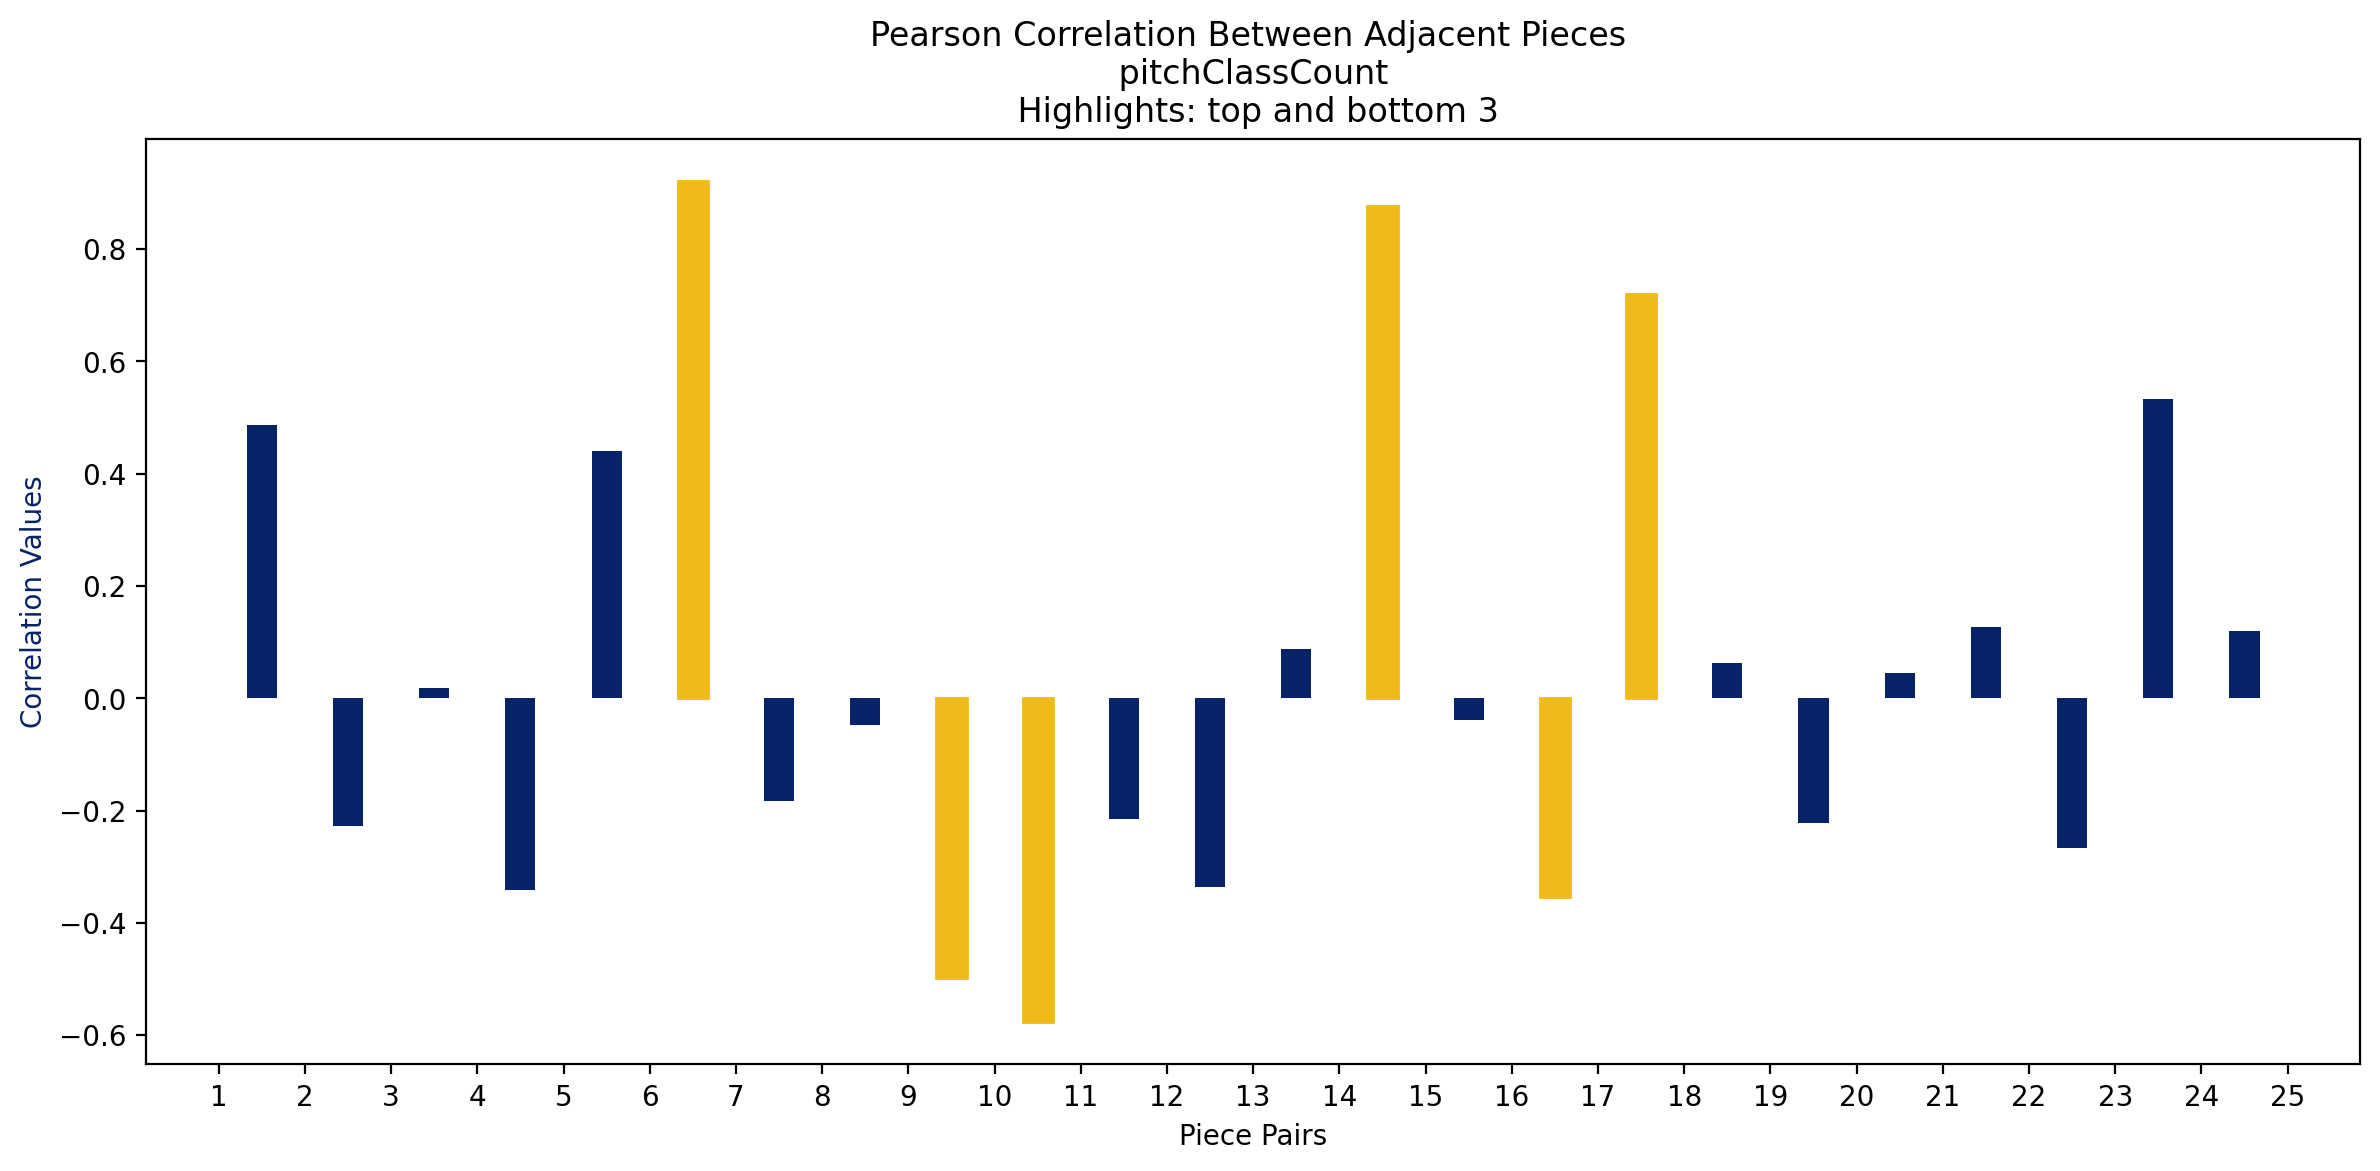

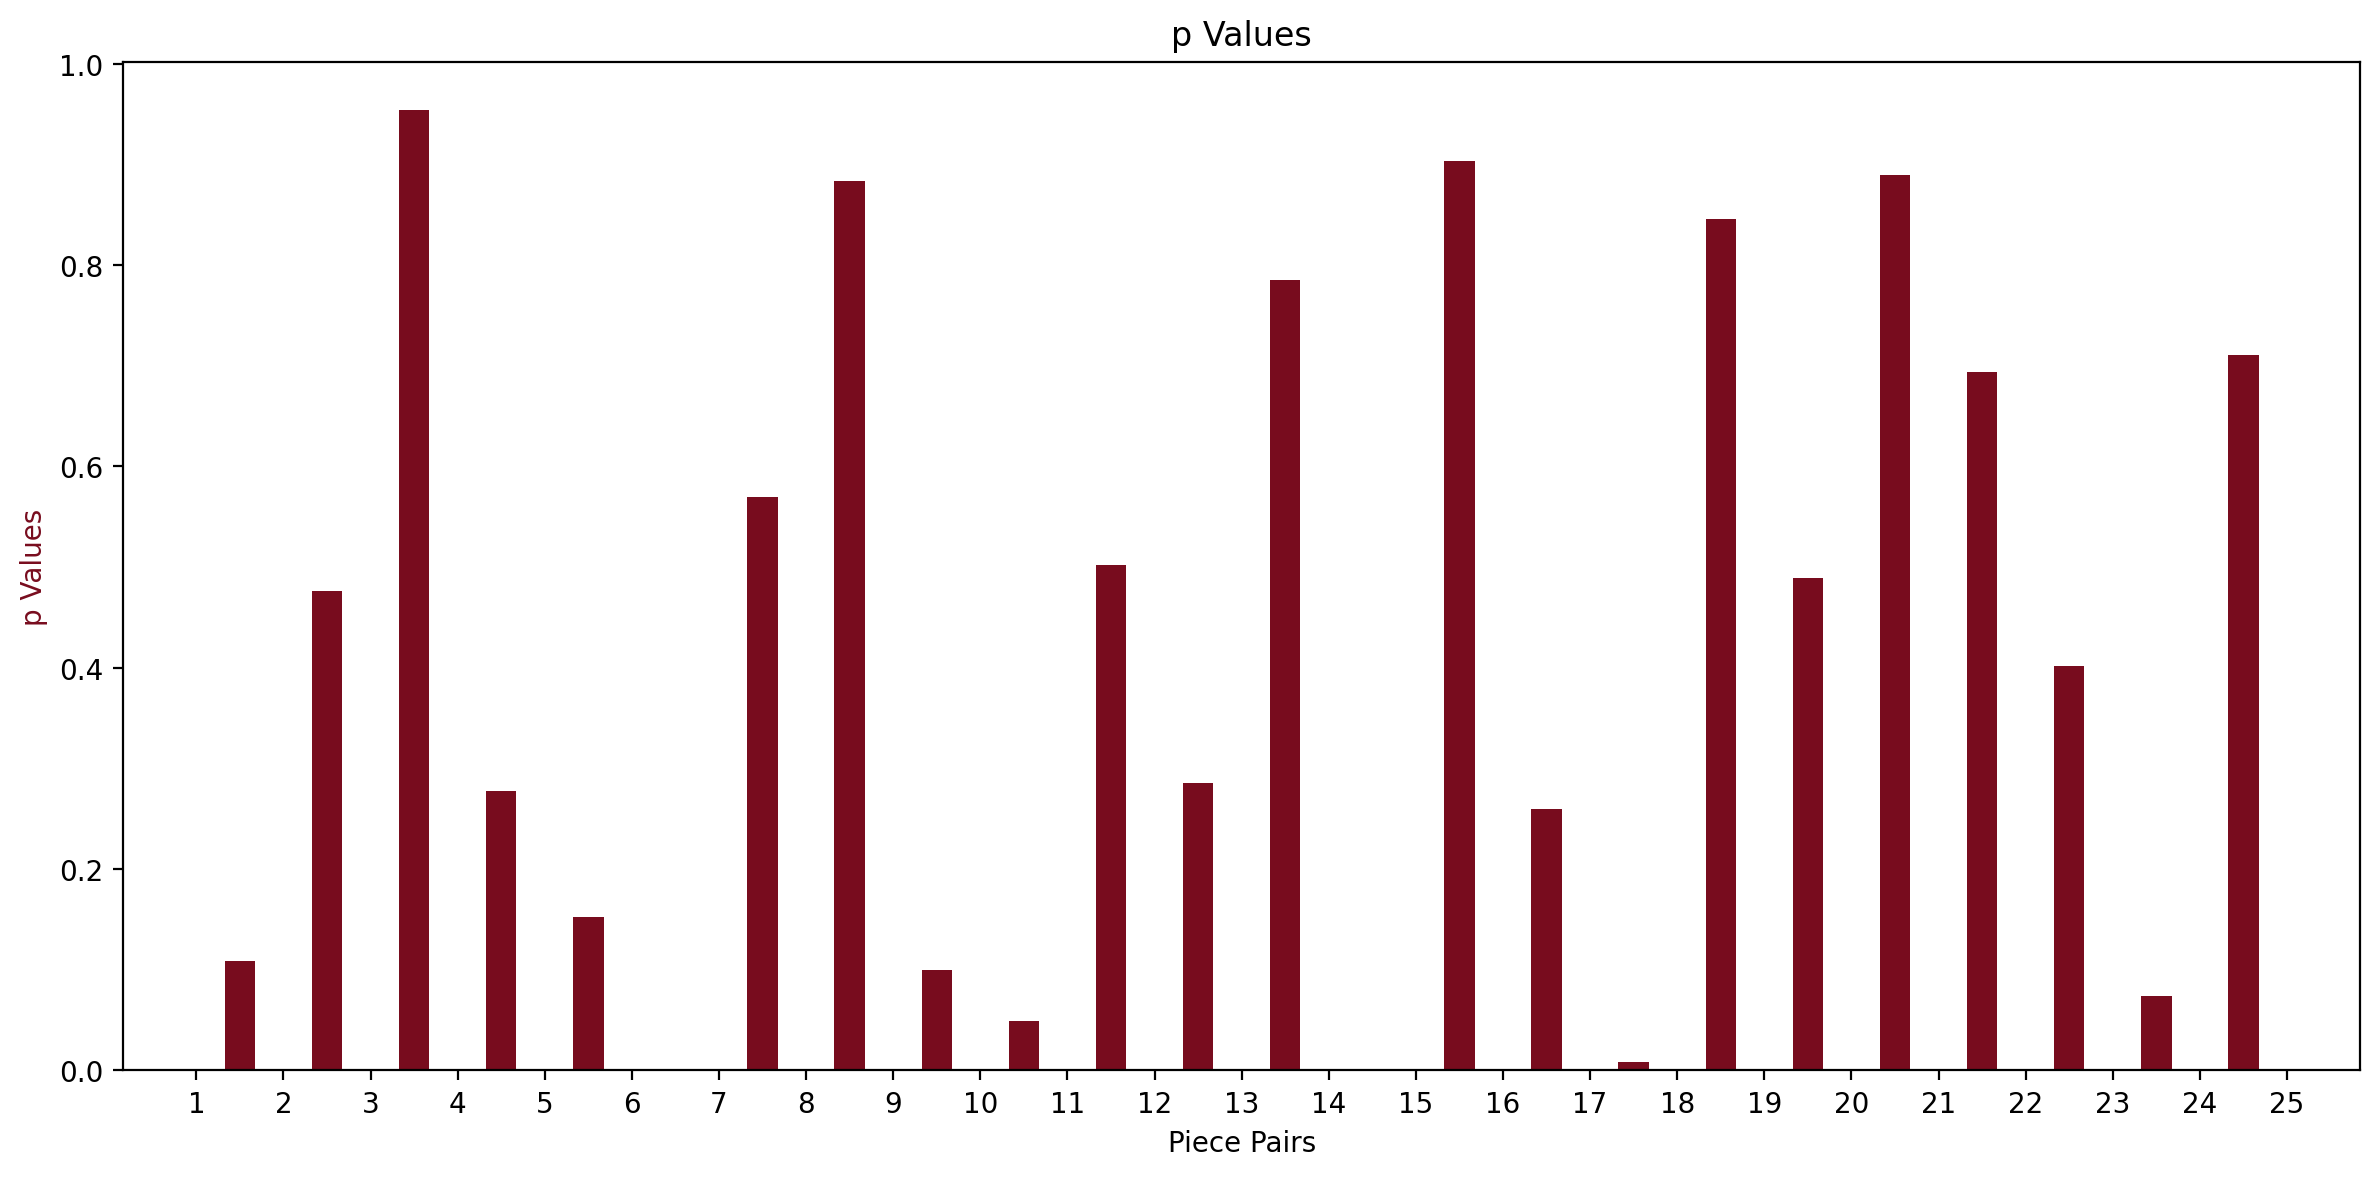

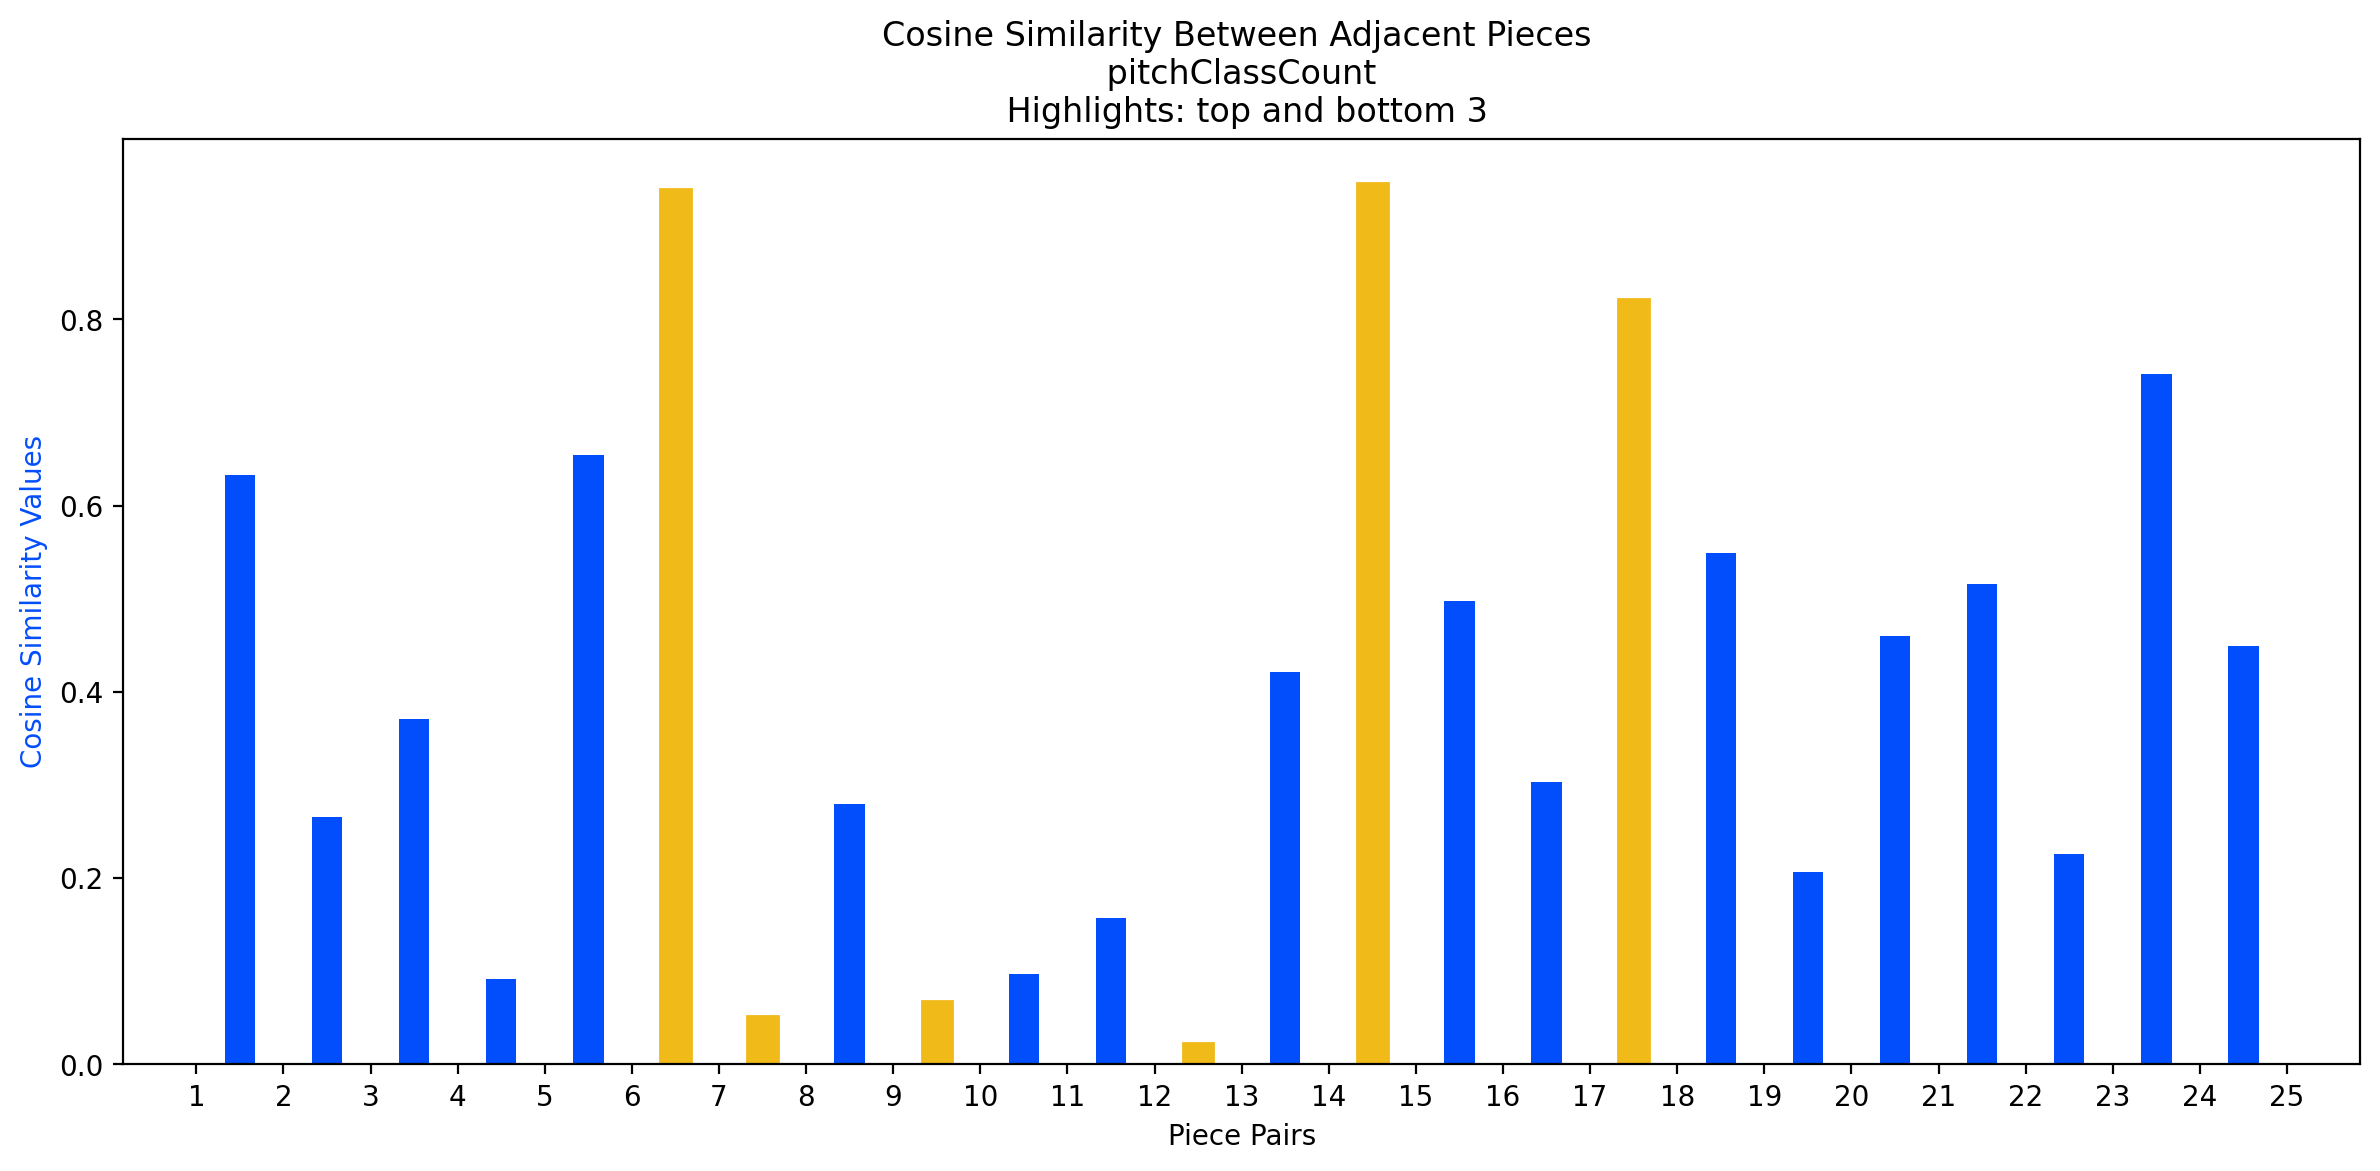

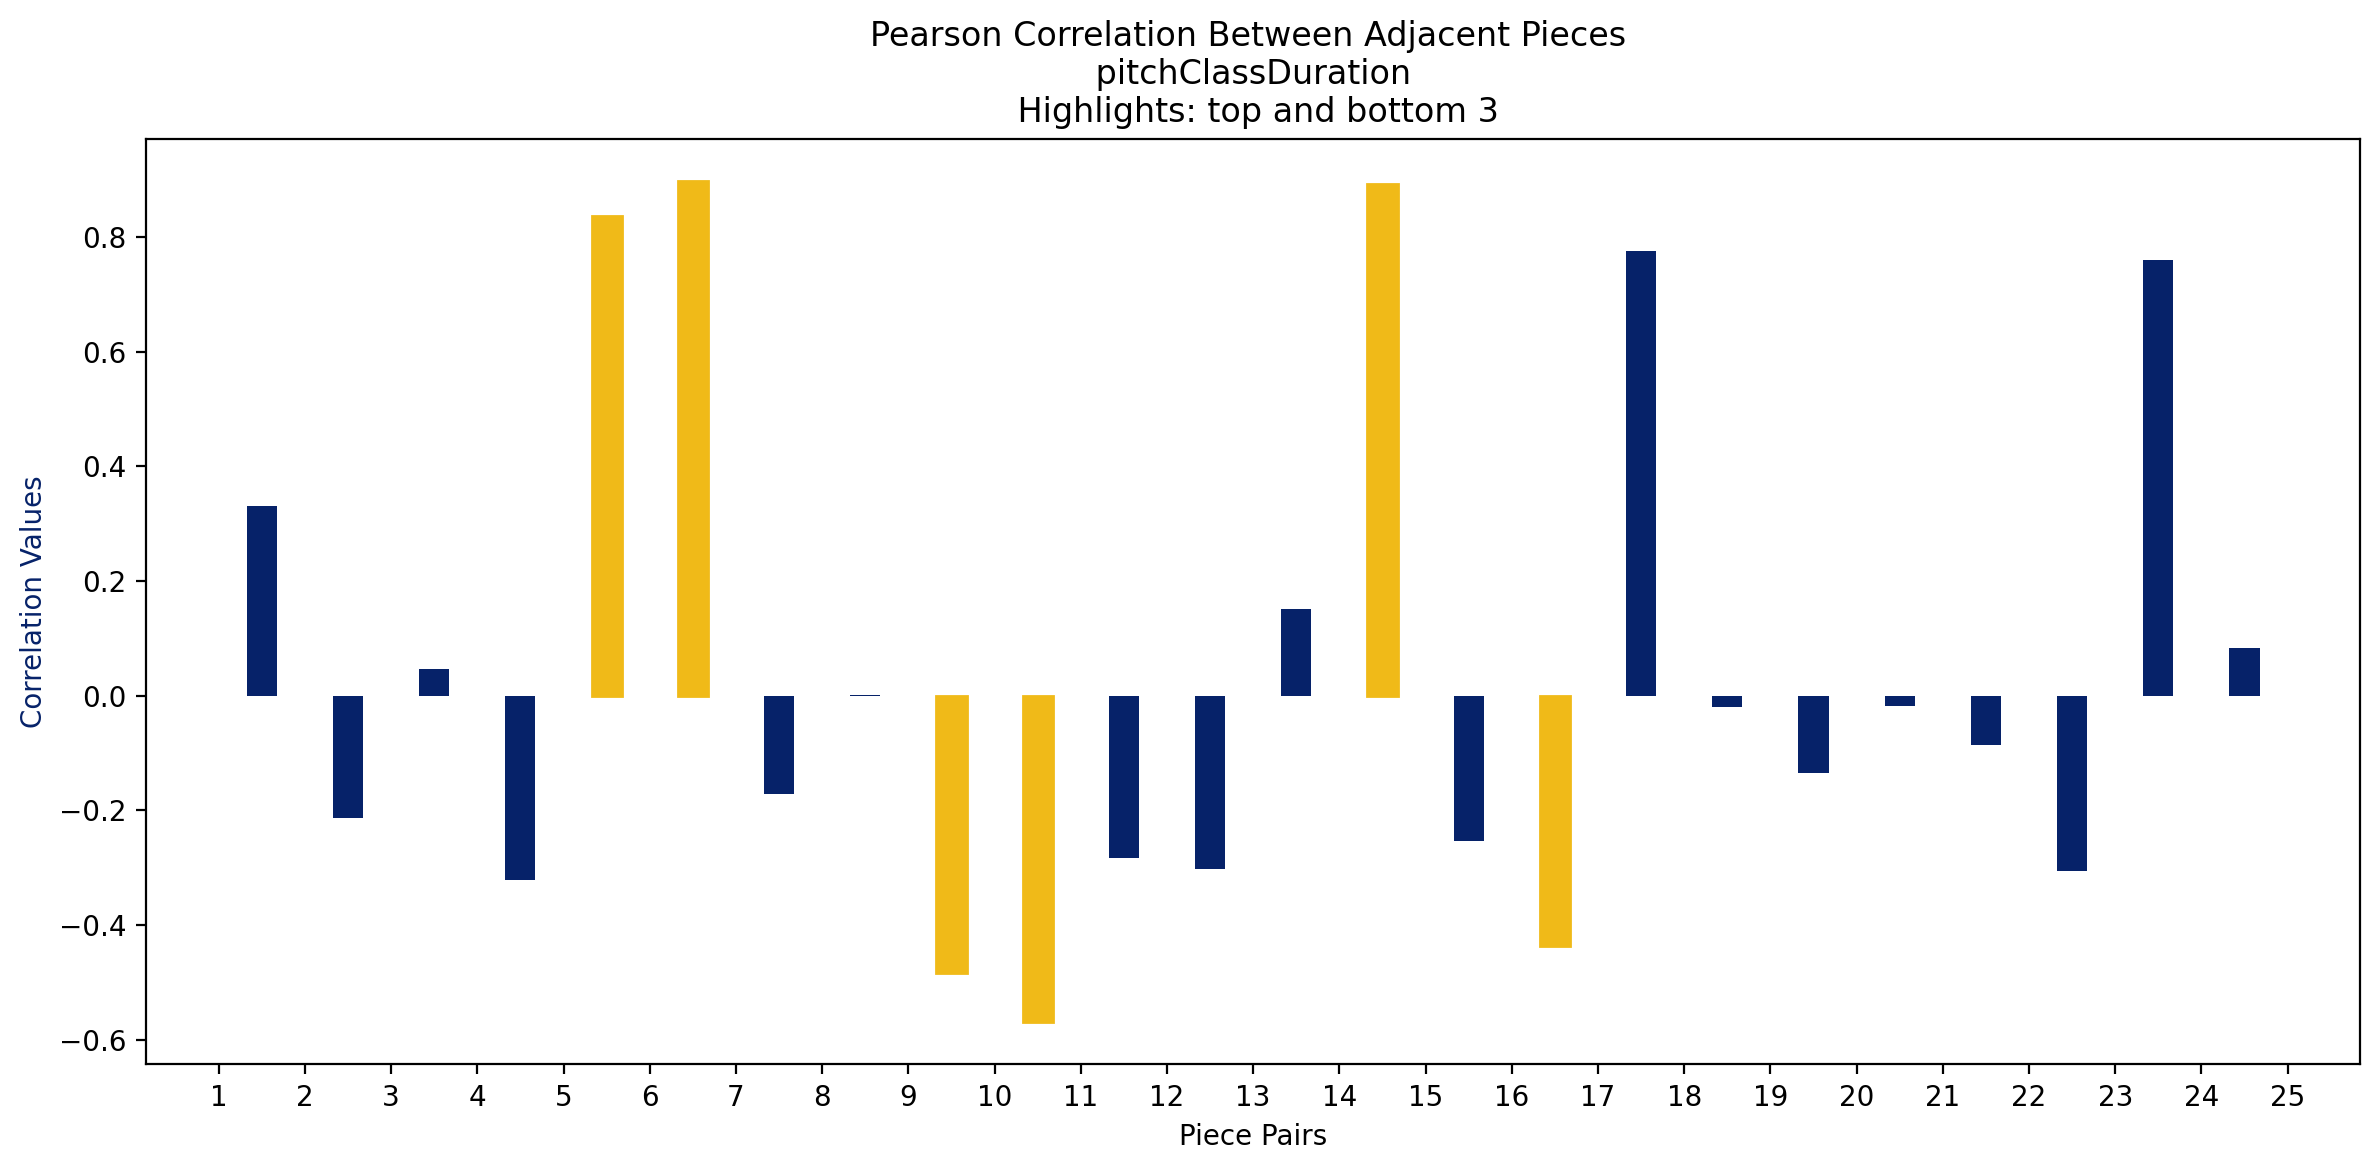

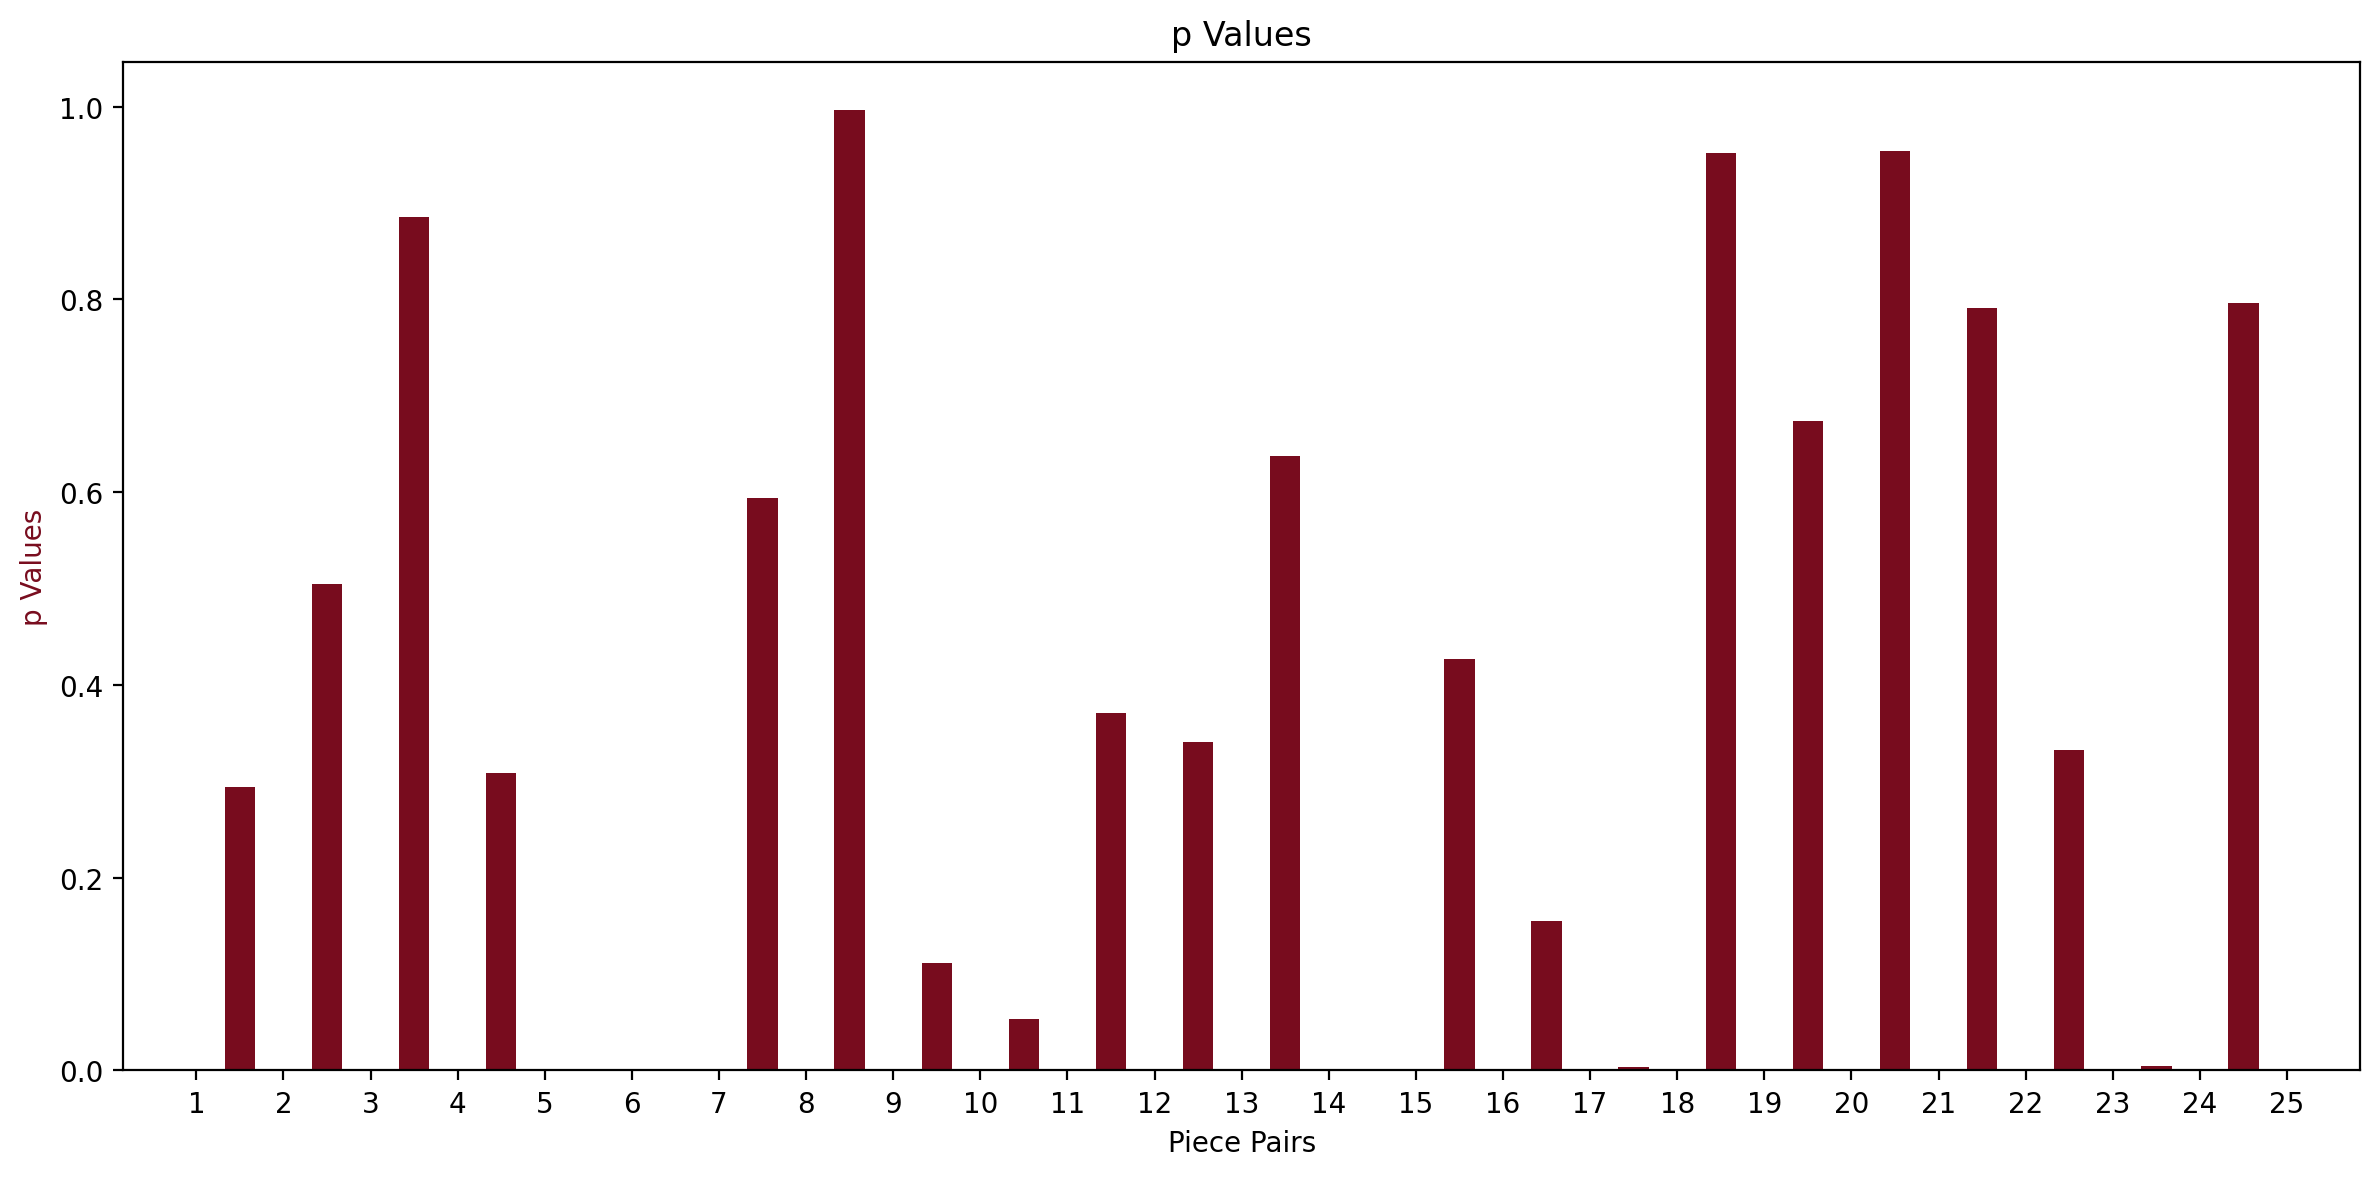

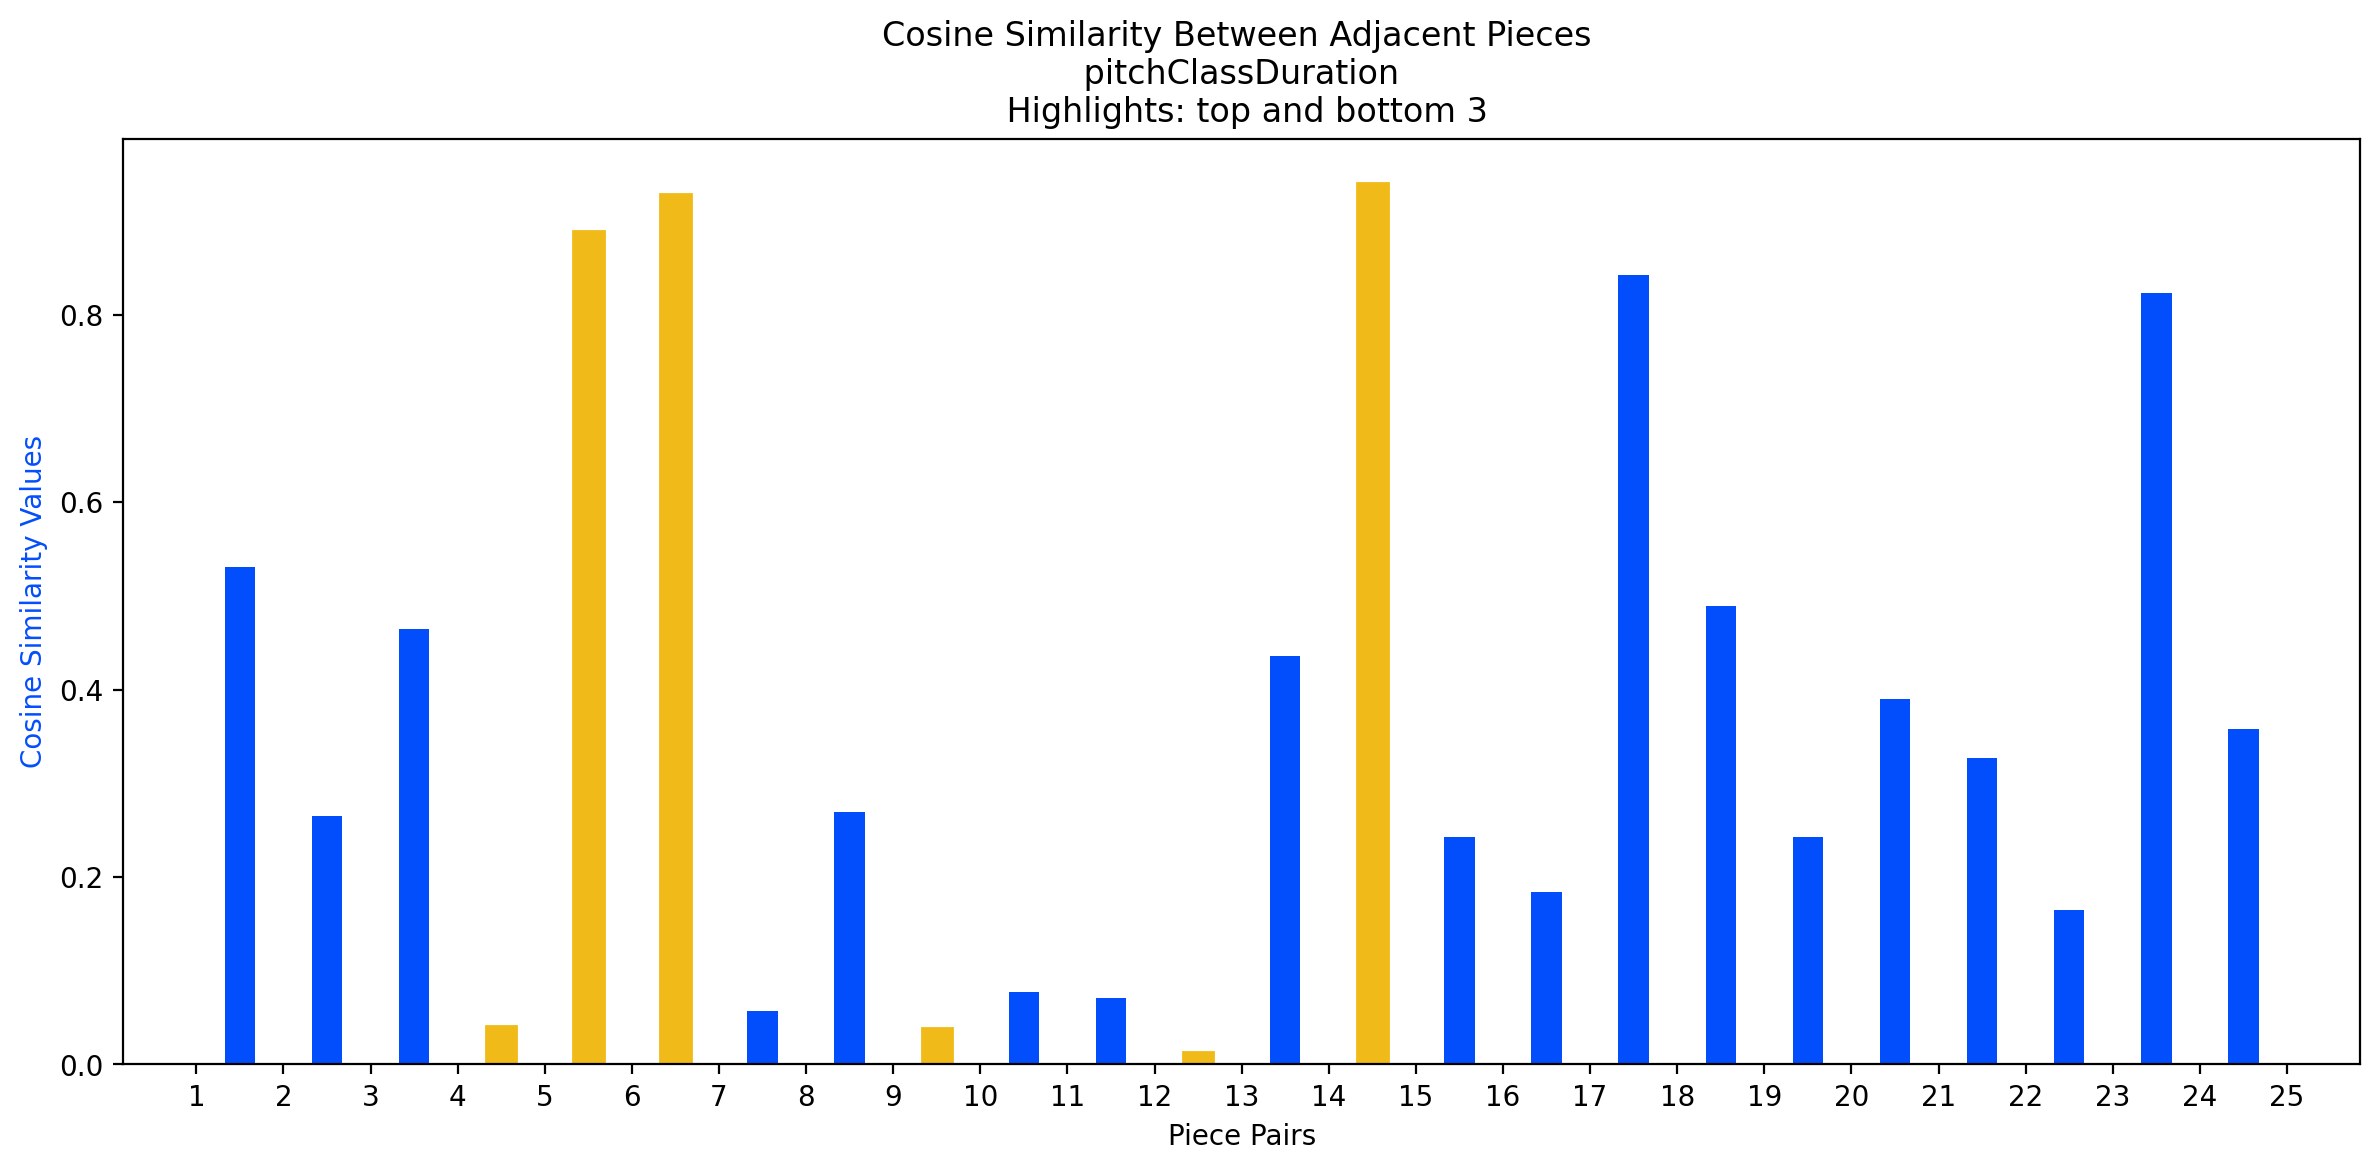

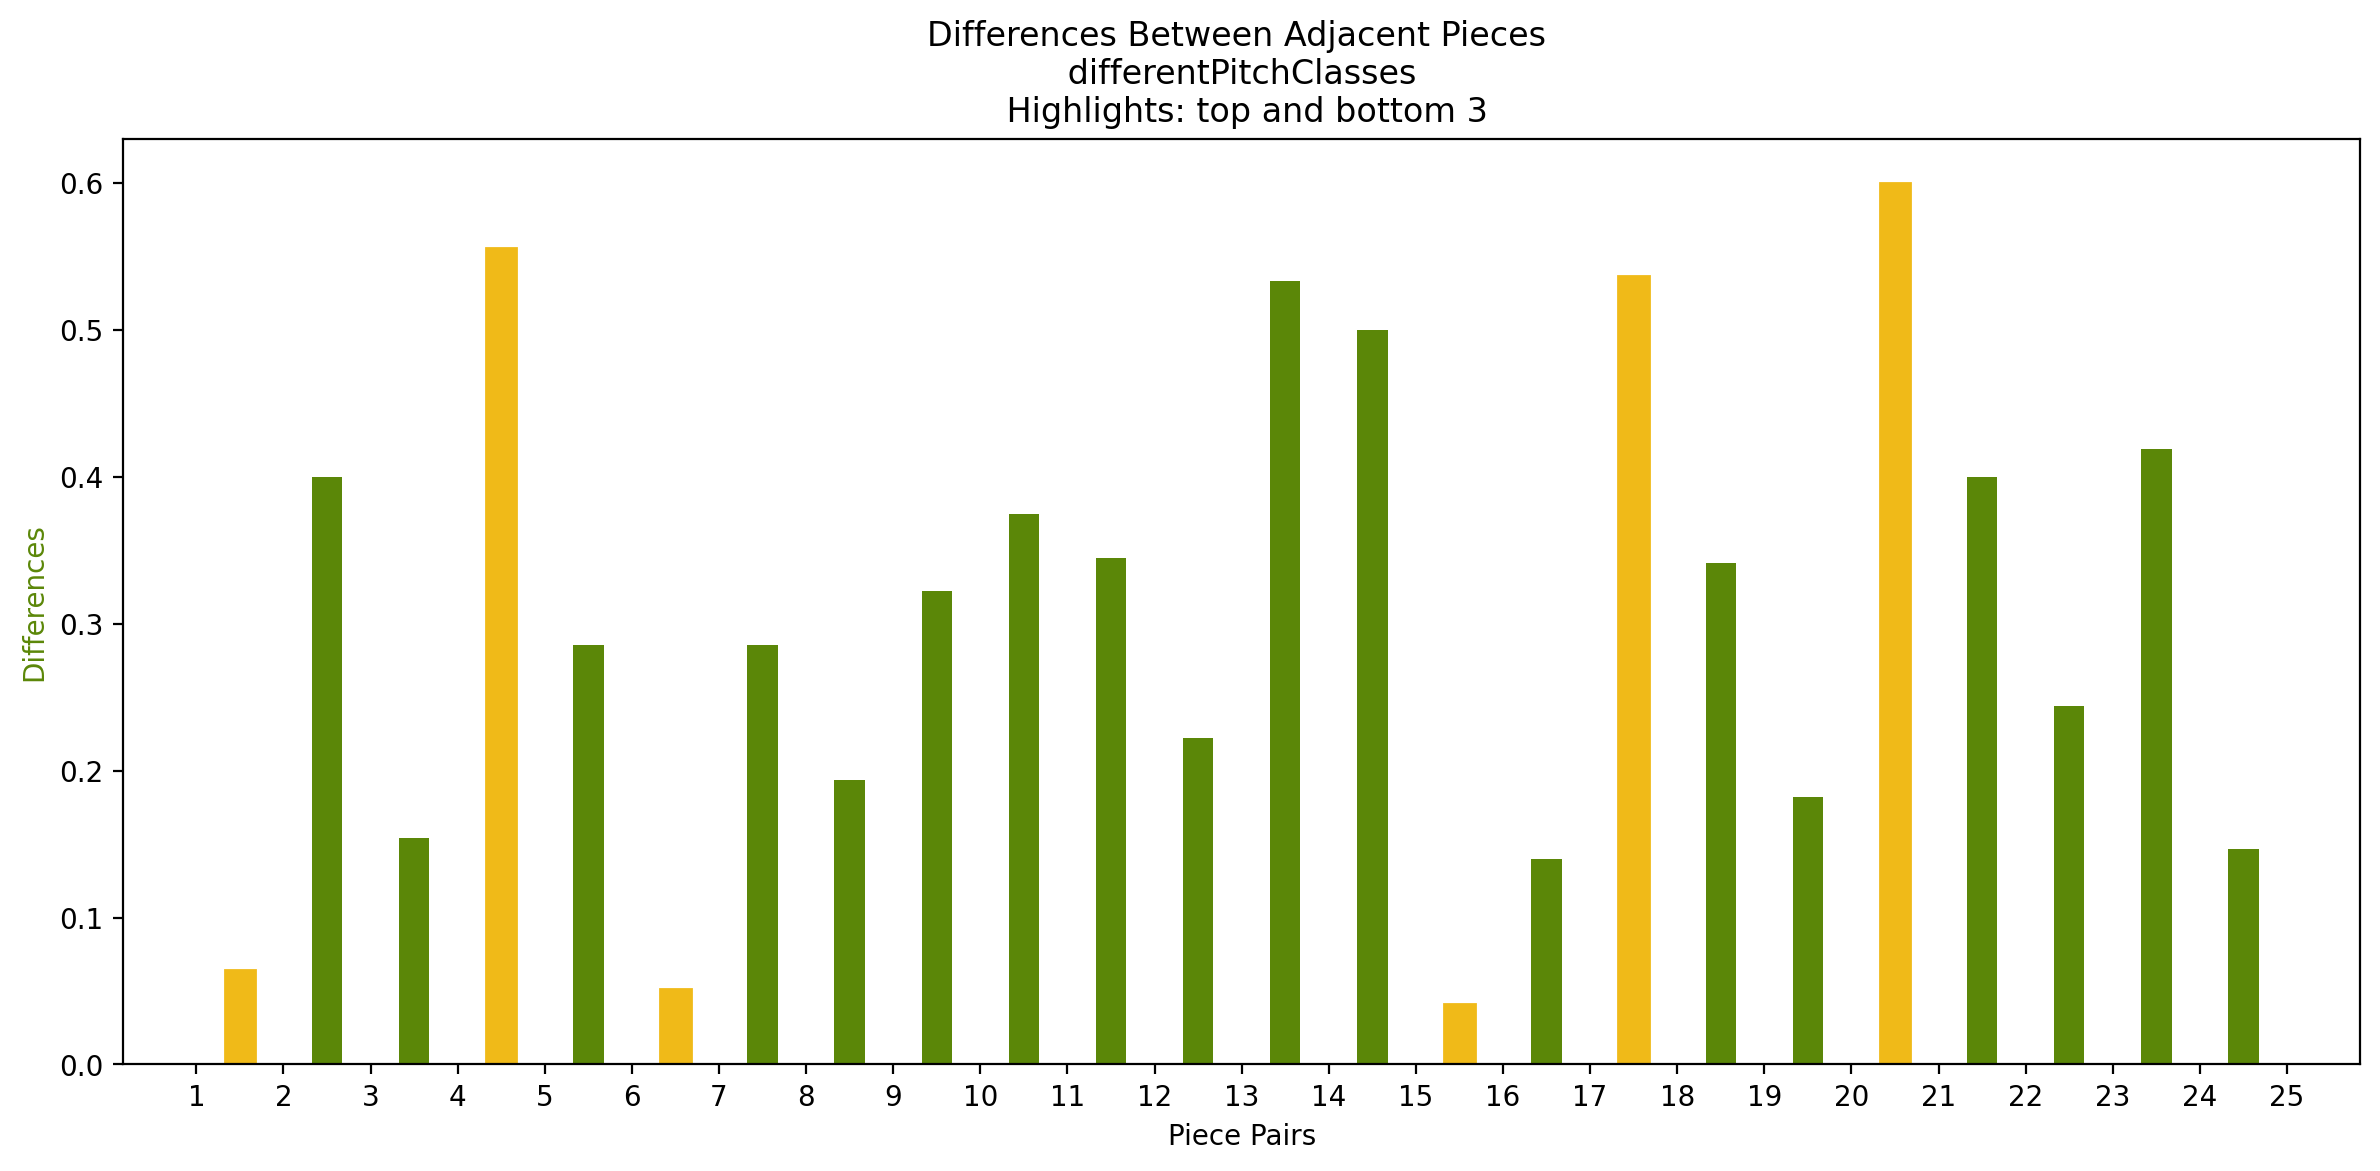

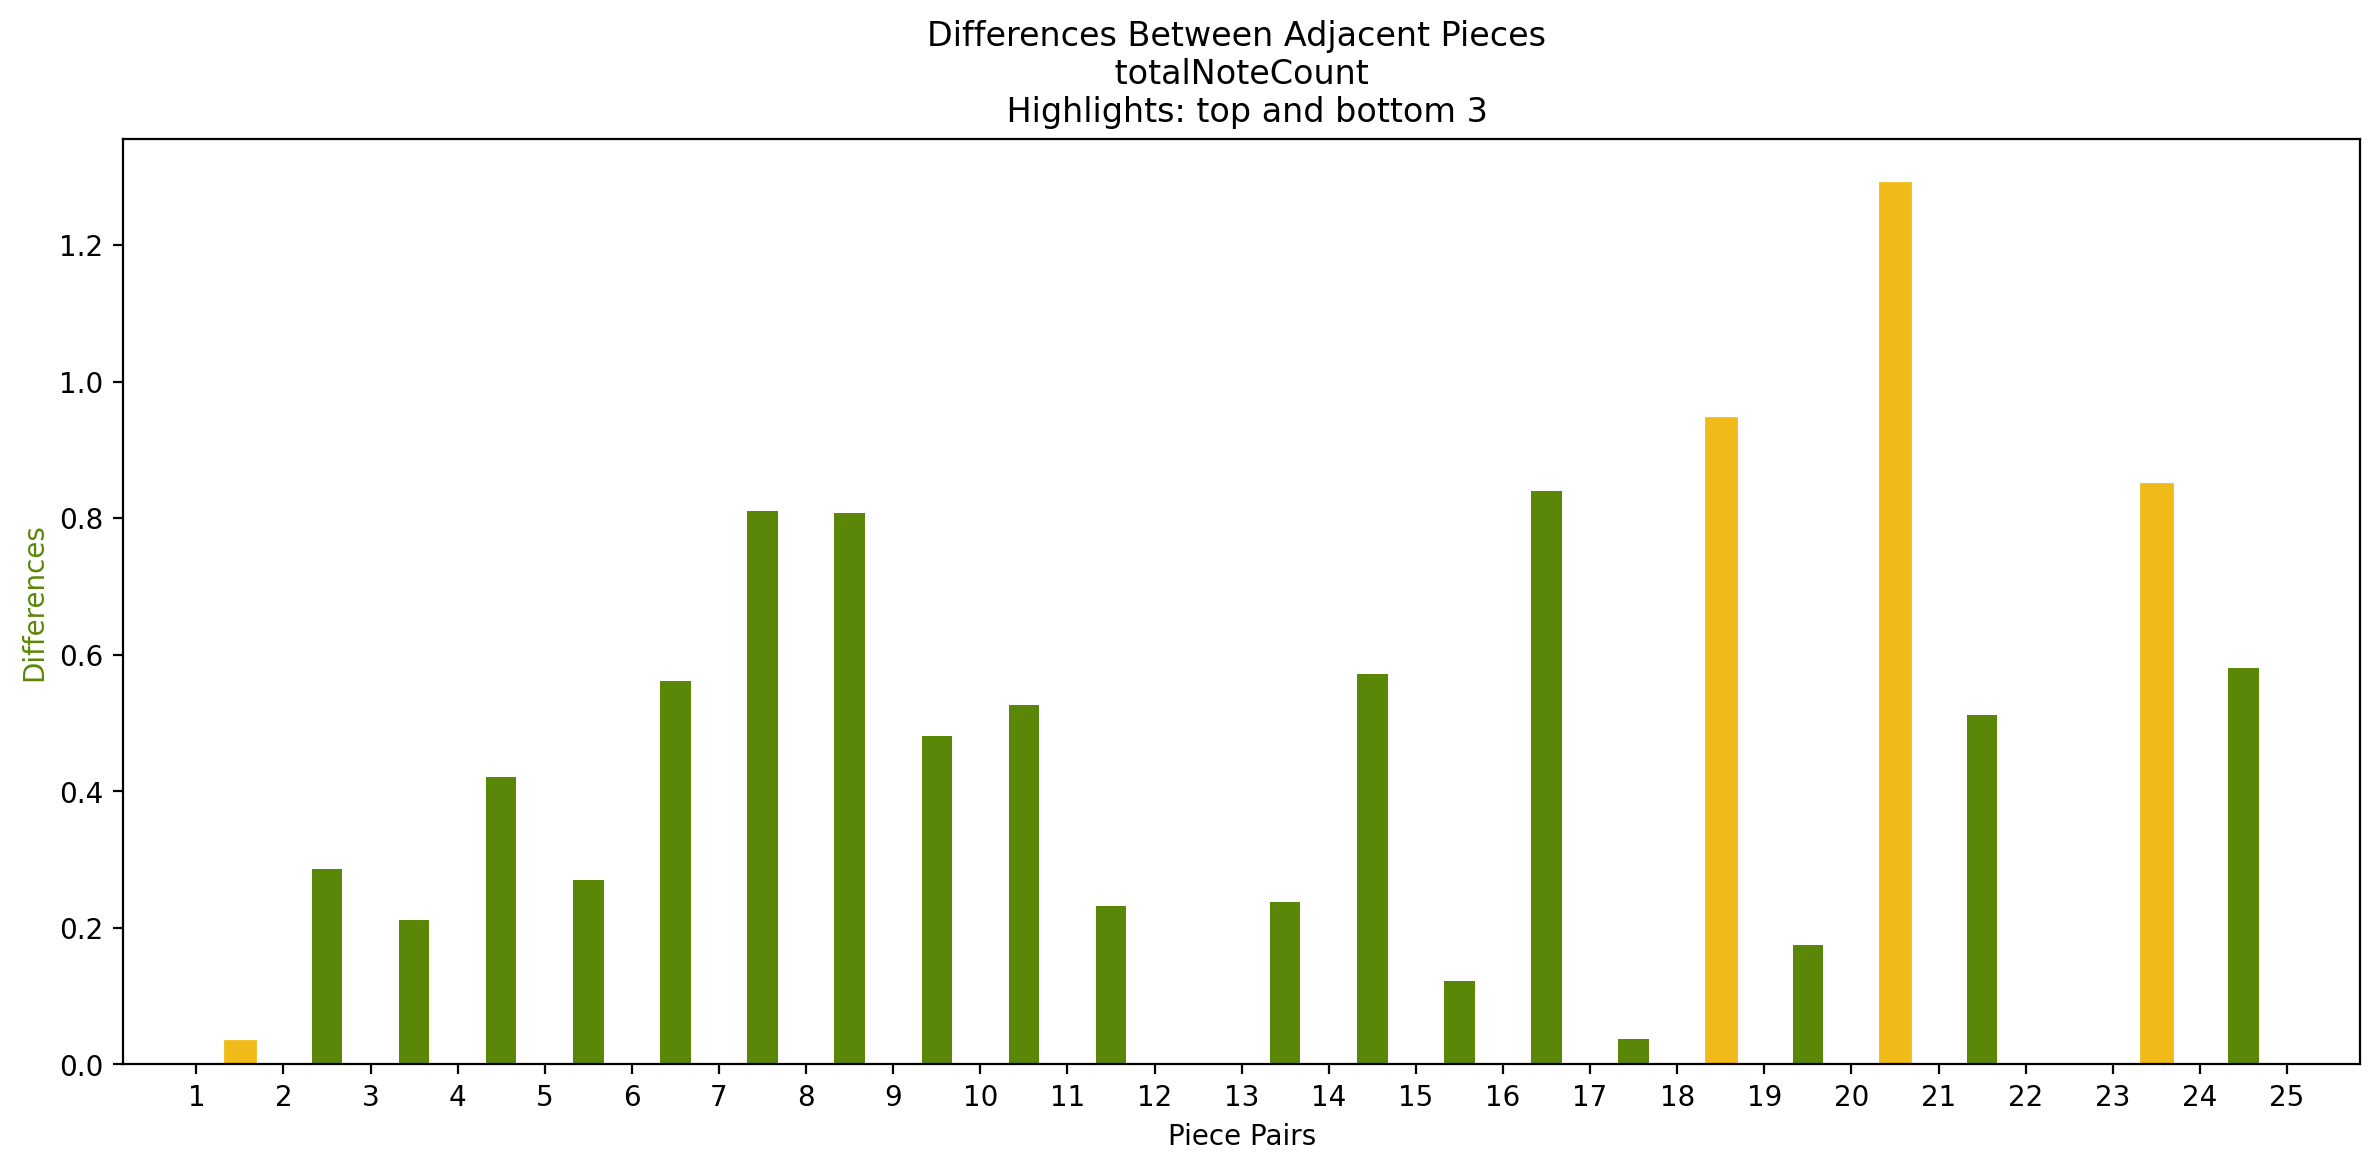

In [109]:
# beginnings-endings

# pitchClassCount
# Pearson Correlation
plotBarChart(pearson_corr_be_pitch_class_count[0], top_bottom_n_pc_be_pitch_class_count,
             title="Pearson Correlation Between Adjacent Pieces \n pitchClassCount \n Highlights: top and bottom 3", xlabel="Piece Pairs", ylabel="Correlation Values")
plotBarChart(pearson_corr_be_pitch_class_count[1], default_color="#780c1e", title="p Values", ylabel="p Values")

# Cosine Similarity
plotBarChart(cosine_sim_be_pitch_class_count[0], top_bottom_n_cs_be_pitch_class_count, title="Cosine Similarity Between Adjacent Pieces \n pitchClassCount \n Highlights: top and bottom 3",
              ylabel="Cosine Similarity Values", default_color="#034efc")

# pitchClassDuration
# Pearson Correlation
plotBarChart(pearson_corr_be_pitch_class_duration[0], top_bottom_n_pc_be_pitch_class_duration,
             title="Pearson Correlation Between Adjacent Pieces \n pitchClassDuration \n Highlights: top and bottom 3", xlabel="Piece Pairs", ylabel="Correlation Values")
plotBarChart(pearson_corr_be_pitch_class_duration[1], default_color="#780c1e", title="p Values", ylabel="p Values")
# Cosine Similarity
plotBarChart(cosine_sim_be_pitch_class_duration[0], top_bottom_n_cs_be_pitch_class_duration, title="Cosine Similarity Between Adjacent Pieces \n pitchClassDuration \n Highlights: top and bottom 3",
              ylabel="Cosine Similarity Values", default_color="#034efc")


# differentPitchClasses
# absolute values
# plotBarChartAbs(data_be_different_pitch_classes_av[0], 
            # title="Absolute values of all pieces \n differentPitchClasses", x_tick_position="on-point", ylabel="Absolute values", default_color="#5b8708")

# Differences
plotBarChart(diff_be_different_pitch_classes[0], top_bottom_n_d_be_different_pitch_classes,
            title="Differences Between Adjacent Pieces \n differentPitchClasses \n Highlights: top and bottom 3", ylabel="Differences", default_color="#5b8708")


# totalNoteCount
# absolute values
# plotBarChartAbs(data_be_total_note_count_av[0], 
            # title="Absolute values of all pieces \n totalNoteCount", ylabel="Absolute values", default_color="#5b8708")

# Differences
plotBarChart(diff_be_total_note_count[0], top_bottom_n_d_be_total_note_count,
             title="Differences Between Adjacent Pieces \n totalNoteCount \n Highlights: top and bottom 3", ylabel="Differences", default_color="#5b8708")




#### General Tendencies Across the Cycle

When looking at the bar charts, a distinct phase of low similarity is identifiable approximately in the second quarter of the cycle, from pieces 7-8 to 13-14, across all four diagrams. This phase is evident in terms of pitch class by the analysis methods of both pitch class duration and pitch class count. The phase is also noticeable in the analysis of different pitch classes, though it is less clearly discernible in total note counts.

Upon examining the song lyrics within this section, one observes significant emotional volatility. The sequence of songs alternates between expressions of outward and inward emotions. The end of this section falls approximately in the middle of the cycle, which is interesting due to the history of the cycle. Schubert originally only set the music for 12 of the poems of Müller's Winterreise and only got to know the other ones when he had already finished the first version of the cycle. The poems to the songs 13-24 have a different order in Müller's poetic cycle - some of them in between the other 12, but Schubert added them at the end to preserve the musical integrity of what he had already composed.

In other sections of the 24-song-cycle, a mixture of high, low, and medium degrees of similarity is present. During these phases, the general emotional themes are more balanced and the changes less abrupt.

For a detailed look at the exact similarity values of piece transitions in different categories, one can look at the tables below:

### Tables

In [110]:
# pitch class count
# Pearson correlation
printAdjacentPiecesSimilarities(pearson_corr_be_pitch_class_count[0], title="pearson_corr_be_pitch_class_count")
# cosine similarity
printAdjacentPiecesSimilarities(cosine_sim_be_pitch_class_count[0], title="cosine_sim_be_pitch_class_count")

# pitch class duration
# Pearson correlation
printAdjacentPiecesSimilarities(pearson_corr_be_pitch_class_duration[0], title="pearson_corr_be_pitch_class_duration")
# cosine similarity
printAdjacentPiecesSimilarities(cosine_sim_be_pitch_class_duration[0], title="cosine_sim_be_pitch_class_duration")

# different pitch classes
# absolute values
printAdjacentPiecesAbsValues(data_be_different_pitch_classes_av, title="data_be_different_pitch_classes_av")
# relative differences
printAdjacentPiecesSimilarities(diff_be_different_pitch_classes[0], mode="values-sorted", title="diff_be_different_pitch_classes")

# total note count
# absolute values
printAdjacentPiecesAbsValues(data_be_total_note_count_av, title="data_be_total_note_count_av")
# relative differences
printAdjacentPiecesSimilarities(diff_be_total_note_count[0], mode="values-sorted", title="diff_be_total_note_count")



Piece 1,Name 1,Piece 2,Name 2,Similarity
6,Wasserflut,7,Auf dem Flusse,0.921367
14,Der greise Kopf,15,Die Krähe,0.876699
17,Im Dorfe,18,Der stürmische Morgen,0.719466
23,Die Nebensonnen,24,Der Leiermann,0.533873
1,Gute Nacht,2,Die Wetterfahne,0.485947
5,Der Lindenbaum,6,Wasserflut,0.439718
21,Das Wirtshaus,22,Mut,0.127319
13,Die Post,14,Der greise Kopf,0.088286
18,Der stürmische Morgen,19,Täuschung,0.062839
20,Der Wegweiser,21,Das Wirtshaus,0.044898


Piece 1,Name 1,Piece 2,Name 2,Similarity
14,Der greise Kopf,15,Die Krähe,0.946409
6,Wasserflut,7,Auf dem Flusse,0.940025
17,Im Dorfe,18,Der stürmische Morgen,0.822008
23,Die Nebensonnen,24,Der Leiermann,0.741180
5,Der Lindenbaum,6,Wasserflut,0.654240
1,Gute Nacht,2,Die Wetterfahne,0.633234
18,Der stürmische Morgen,19,Täuschung,0.549273
21,Das Wirtshaus,22,Mut,0.515468
15,Die Krähe,16,Letzte Hoffnung,0.497536
20,Der Wegweiser,21,Das Wirtshaus,0.460409


Piece 1,Name 1,Piece 2,Name 2,Similarity
6,Wasserflut,7,Auf dem Flusse,0.897780
14,Der greise Kopf,15,Die Krähe,0.892599
5,Der Lindenbaum,6,Wasserflut,0.837265
17,Im Dorfe,18,Der stürmische Morgen,0.775109
23,Die Nebensonnen,24,Der Leiermann,0.759395
1,Gute Nacht,2,Die Wetterfahne,0.330319
13,Die Post,14,Der greise Kopf,0.151895
3,Gefrorne Tränen,4,Erstarrung,0.046638
8,Rückblick,9,Irrlicht,0.001335
20,Der Wegweiser,21,Das Wirtshaus,-0.018932


Piece 1,Name 1,Piece 2,Name 2,Similarity
14,Der greise Kopf,15,Die Krähe,0.940618
6,Wasserflut,7,Auf dem Flusse,0.929325
5,Der Lindenbaum,6,Wasserflut,0.889100
17,Im Dorfe,18,Der stürmische Morgen,0.842645
23,Die Nebensonnen,24,Der Leiermann,0.823070
1,Gute Nacht,2,Die Wetterfahne,0.530832
18,Der stürmische Morgen,19,Täuschung,0.488797
3,Gefrorne Tränen,4,Erstarrung,0.464522
13,Die Post,14,Der greise Kopf,0.436010
20,Der Wegweiser,21,Das Wirtshaus,0.390415


Piece 1,Name 1,Value beginning,Value ending
1,Gute Nacht,5.50,3.75
2,Die Wetterfahne,4.00,3.50
3,Gefrorne Tränen,5.25,5.25
4,Erstarrung,4.50,3.25
5,Der Lindenbaum,5.75,7.00
6,Wasserflut,5.25,5.00
7,Auf dem Flusse,4.75,3.00
8,Rückblick,4.00,4.25
9,Irrlicht,3.50,4.50
10,Rast,3.25,3.25


Piece 1,Name 1,Piece 2,Name 2,Similarity
15,Die Krähe,16,Letzte Hoffnung,0.040816
6,Wasserflut,7,Auf dem Flusse,0.051282
1,Gute Nacht,2,Die Wetterfahne,0.064516
16,Letzte Hoffnung,17,Im Dorfe,0.139535
3,Gefrorne Tränen,4,Erstarrung,0.153846
19,Täuschung,20,Der Wegweiser,0.181818
8,Rückblick,9,Irrlicht,0.193548
12,Einsamkeit,13,Die Post,0.222222
22,Mut,23,Die Nebensonnen,0.243902
5,Der Lindenbaum,6,Wasserflut,0.285714


Piece 1,Name 1,Value beginning,Value ending
1,Gute Nacht,15.00,15.00
2,Die Wetterfahne,14.50,14.00
3,Gefrorne Tränen,10.50,13.75
4,Erstarrung,17.00,11.25
5,Der Lindenbaum,17.25,20.00
6,Wasserflut,15.25,14.25
7,Auf dem Flusse,8.00,8.25
8,Rückblick,19.50,20.00
9,Irrlicht,8.50,12.25
10,Rast,7.50,7.00


Piece 1,Name 1,Piece 2,Name 2,Similarity
12,Einsamkeit,13,Die Post,0.000000
22,Mut,23,Die Nebensonnen,0.000000
1,Gute Nacht,2,Die Wetterfahne,0.033898
17,Im Dorfe,18,Der stürmische Morgen,0.037736
15,Die Krähe,16,Letzte Hoffnung,0.122449
19,Täuschung,20,Der Wegweiser,0.174757
3,Gefrorne Tränen,4,Erstarrung,0.211382
11,Frühlingstraum,12,Einsamkeit,0.232558
13,Die Post,14,Der greise Kopf,0.238095
5,Der Lindenbaum,6,Wasserflut,0.269504


On a brief examination of the most and least similar pairings of pieces in this table, one observes significant similarities across the categories that represent tonality between the measurement methods. Simultaneously, there appear to be fewer overlaps between the top 3 of similarity (i.e. low relative differences) across different categories, such as pitch class count and total note count. This observation will be further investigated in the following sections.

#### Analyzing intersection of the top and bottom 3 of different categories

In [111]:
printIntersections(tonality_top_3, title = "tonality_top_3")
printIntersections(tonality_bottom_3, title = "tonality_bottom_3")


Song Numbers,Song Names,Occurr.,List Appearances
"6, 7","Wasserflut, Auf dem Flusse",4,"pitch_class_count_pc_be_top_3, pitch_class_duration_pc_be_top_3, pitch_class_count_cs_be_top_3, pitch_class_duration_cs_be_top_3"
"14, 15","Der greise Kopf, Die Krähe",4,"pitch_class_count_pc_be_top_3, pitch_class_duration_pc_be_top_3, pitch_class_count_cs_be_top_3, pitch_class_duration_cs_be_top_3"
"17, 18","Im Dorfe, Der stürmische Morgen",2,"pitch_class_count_pc_be_top_3, pitch_class_count_cs_be_top_3"
"5, 6","Der Lindenbaum, Wasserflut",2,"pitch_class_duration_pc_be_top_3, pitch_class_duration_cs_be_top_3"


Song Numbers,Song Names,Occurr.,List Appearances
"16, 17","Letzte Hoffnung, Im Dorfe",2,"pitch_class_count_pc_be_bottom_3, pitch_class_duration_pc_be_bottom_3"
"9, 10","Irrlicht, Rast",4,"pitch_class_count_pc_be_bottom_3, pitch_class_duration_pc_be_bottom_3, pitch_class_count_cs_be_bottom_3, pitch_class_duration_cs_be_bottom_3"
"10, 11","Rast, Frühlingstraum",2,"pitch_class_count_pc_be_bottom_3, pitch_class_duration_pc_be_bottom_3"
"7, 8","Auf dem Flusse, Rückblick",1,pitch_class_count_cs_be_bottom_3
"12, 13","Einsamkeit, Die Post",2,"pitch_class_count_cs_be_bottom_3, pitch_class_duration_cs_be_bottom_3"
"4, 5","Erstarrung, Der Lindenbaum",1,pitch_class_duration_cs_be_bottom_3


Looking at these tables, it becomes clear that within the category of tonality the different methods of measuerment show a high degree of intersection, particularly in the top 3. Two of the song pairs "Wasserflut" and "Auf dem Flusse" and "Der greise Kopf" and "Die Krähe" are even appearing in all 4 of categories. Within the bottom 3 of tonality only one pair occurs in all 4 lists and the broad category of tonality bottom 3 is spread accross 6 instead of 4 song pairs.

When comparing the findings of the tables above with the key signatures in the table below, one can see that these almost always align with the overall key signatures of the pieces: high similarity coincides with the same or similar key and vice versa. This may seem trivial, but it also hints at the well known phenomenon that in tonal western music beginnings and endings tend to be indicative of the key of the whole piece. The notable deviation from this principle in our dataset could be an interesting subject for further investigation. A starting point for this endeavour could be the comparison of the beginnings-endings and whole-pieces-adjacent data of this project. Furthermore the local key data from the Winterreise Dataset should be incorporated and algorithms for the investigation of pitch classes over the course of different pieces could be programmed.

#### Table from Weiß et al.: Schubert Winterreise Dataset: A Multimodal Scenario for Music Analysis (2021)

![Table from Weiß et al.: Schubert Winterreise Dataset: A Multimodal Scenario for Music Analysis (2021)](table-weiss-et-al.png)



In the next step, I am looking at the intersections between the three broad categories tonality, harmonic complexity (different pitch classes), and texture (total note count).

In [112]:
printIntersections(broad_categories_top_3, title = "broad_categories_top_3")
printIntersections(broad_categories_bottom_3, title = "broad_categories_bottom_3")

Song Numbers,Song Names,Occurr.,List Appearances
"6, 7","Wasserflut, Auf dem Flusse",2,"combined_tonality_top_3, different_pitch_classes_d_be_top_3"
"14, 15","Der greise Kopf, Die Krähe",1,combined_tonality_top_3
"17, 18","Im Dorfe, Der stürmische Morgen",1,combined_tonality_top_3
"5, 6","Der Lindenbaum, Wasserflut",1,combined_tonality_top_3
"1, 2","Gute Nacht, Die Wetterfahne",2,"different_pitch_classes_d_be_top_3, total_note_count_d_be_top_3"
"15, 16","Die Krähe, Letzte Hoffnung",1,different_pitch_classes_d_be_top_3
"12, 13","Einsamkeit, Die Post",1,total_note_count_d_be_top_3
"22, 23","Mut, Die Nebensonnen",1,total_note_count_d_be_top_3


Song Numbers,Song Names,Occurr.,List Appearances
"16, 17","Letzte Hoffnung, Im Dorfe",1,combined_tonality_bottom_3
"9, 10","Irrlicht, Rast",1,combined_tonality_bottom_3
"10, 11","Rast, Frühlingstraum",1,combined_tonality_bottom_3
"7, 8","Auf dem Flusse, Rückblick",1,combined_tonality_bottom_3
"12, 13","Einsamkeit, Die Post",1,combined_tonality_bottom_3
"20, 21","Der Wegweiser, Das Wirtshaus",2,"different_pitch_classes_d_be_bottom_3, total_note_count_d_be_bottom_3"
"4, 5","Erstarrung, Der Lindenbaum",1,different_pitch_classes_d_be_bottom_3
"17, 18","Im Dorfe, Der stürmische Morgen",1,different_pitch_classes_d_be_bottom_3
"18, 19","Der stürmische Morgen, Täuschung",1,total_note_count_d_be_bottom_3
"23, 24","Die Nebensonnen, Der Leiermann",1,total_note_count_d_be_bottom_3


It is evident that pairs of pieces seldomly appear in more than one of those categories (only 3 times out of 18) and that there is no pair that appears in all three categories. If a pair appears in more than one category, it is either tonality and harmonic complexity or harmonic complexity. In contrast, high tonal similarity never coincides with high textural similarity at least not for the top 3. One could further investigate where exactly on the similarity spectrum the other parameters lie when one parameter is particularly high or low.


### Overall Observations

The similarity in texture and tonality often operates independently within Schubert's cycle, as does the similarity in harmonic complexity. It can be concluded that Schubert plays with contrasts and similarities, noticeably more so at points where it is thematically justified. Nonetheless, the musical coherence of the cycle is generally maintained through the presence of at least one parameter showing high or medium similarity in cases of significant differences, and vice versa. This ensures musical variety, development, and a form of dramatic progression throughout the cycle.

Finally, I want to give an example of what the analysis of the whole pieces - adjacent and non-adjacent - could look like.

## All whole pieces

#### Example: Cosine similarity in all (adjacent and non-adjacent) whole pieces based on pitch class count

In [113]:
# pitch class count
printWholePiecesAllSimilarities(cosine_sim_wp_pitch_class_count[0], similarity_measure="Cosine Similarity", title="cosine_sim_wp_pitch_class_count")


Piece 1,Name 1,Piece 2,Name 2,Cosine Similarity
10,Rast,15,Die Krähe,0.989085
8,Rückblick,22,Mut,0.976510
4,Erstarrung,14,Der greise Kopf,0.959561
14,Der greise Kopf,15,Die Krähe,0.950866
10,Rast,14,Der greise Kopf,0.941889
2,Die Wetterfahne,24,Der Leiermann,0.931290
9,Irrlicht,12,Einsamkeit,0.928340
11,Frühlingstraum,24,Der Leiermann,0.918873
4,Erstarrung,10,Rast,0.916922
5,Der Lindenbaum,7,Auf dem Flusse,0.916845


Many of the most similar pieces are non-adjecent, which hints at musical connections accross the cycle. Analyzing this in detail could be a subject for further investigation. 

# Conclusion

Using these computer-assisted analytical methods, it was possible to demonstrate in a transparent and quantitative manner how similarities and dissimilarities among various parameters shape the musical coherence within a cycle. Nevertheless, this analysis is by no means comprehensive.

For simplicity and comparability, I focused my analysis of the most conspicuous and significant values on the top and bottom 3, because the calculation of relative differences and cosine similarity, unlike Pearson correlation, does not provide p-values that could guide interpretation. Including p-values would likely enhance the robust assessment of the data. However, using various methods of measuring similarity, which yield very similar results in this case, ensures a certain reliability of the findings.

I also primarily examined the relationships between transitions from one piece to another, approximated by the last or first four measures—a method that might be questioned in pieces of varying tempos. A brief overview of the relationships across entire pieces, including those not sequentially adjacent (as shown in the table All whole pieces - cosine_sim_wp_pitch_class_count), suggests a further intriguing subject for future analysis. This could provide additional insights into the broader structural coherence within the cycle.

Future analyses could incorporate additional elements, including alternative types of data visualization, the integration of data on local key areas from the Schubert Winterreise Dataset, or the inclusion of computer-assisted lyrics analysis, potentially with the aid of artificial intelligence. 

Consideration could also be given to incorporating additional measures of similarity, such as the Jaccard similarity, or potentially calculating a composite similarity index from various methods for more robust results. It would be prudent to further explore, beyond the scope of this project, which measurement methods are particularly well-suited for specific types of musical data.

Finally, it can be said that this analysis represents just one potential starting point for the quantitative, computer-assisted study of song cycles, and it raises more questions and possibilities than it answers. Applying the methodologies demonstrated here, as well as further developed methods, to other corpora could provide additional context to determine which parts of the analytical results mark the characteristic style of a work, an era, or a composer, and where they may reflect more universal musical principles. 

# References

Schubert Winterreise Dataset (version 2.0), Accessed April 29, 2024. https://doi.org/10.5281/zenodo.5139893

Weiß, C., Zalkow, F., Arifi-Müller, V., Müller, M., Koops, H. V., Volk, A., & Grohganz, H. G. (2021). Schubert Winterreise Dataset: A Multimodal Scenario for Music Analysis. Journal on Computing and Cultural Heritage, 14(2), 25:1-25:18. Accessed April 29, 2024. https://doi.org/10.1145/3429743

Dürr, Walther and Michael Kube. “Schubert (Wien),” Franz, WÜRDIGUNG, Das Lied, Liederzyklen. In: MGG Online, edited by Laurenz Lütteken. RILM, Bärenreiter, Metzler, 2016–. Article first published 2006. Article published online 2016. Accessed April 29, 2024. https://www.mgg-online.com/mgg/stable/28837